In [1]:
from IPython.display import display, Markdown
import pandas as pd
import os 
import plotly
import seaborn as sns
import matplotlib.pyplot as plt

import cufflinks as cf
from pivottablejs import pivot_ui
import plotly.offline
import json
import statsmodels.api as sm
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
%matplotlib inline

sourceUrl = os.getcwd().split('work')[0] + 'work/datasets/i2i/newDatav7'

# Mobile gender data

The data was collected through SMS and short questions through i2i.

The purpose of collecting the data is too look at different areas of economic empowerment that may differ across men and women and within men and women by things like age, education, area etc.



We broke this down into:

* Mobile phone indicators – because this could be an empowering asset
* Financial inclusion indicators
* Indicators that look at control and decision-making
* Earning and spending
* Spouse work
 

There are 20 indicators are ordered in those categories and it should be easy to group them accordingly.

or alternatively, you can break the categories into something else if you guys feel it tells the story better.

**note:** to be displayed on the platform we will require the actual values for each category not their code; but for exploratory pourposes we can work with the codes

Alicia Questions:
* The metadata for the columns and their codes

## Exploratory Phase

In [2]:
datasetLabeled = pd.read_csv(f'{sourceUrl}/200303 Kenya CAPI weighted outputs label update.csv',decimal=',', sep=';')

In [3]:
datasetLabeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 35 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   InstanceID                                             3000 non-null   int64  
 1   finalweight                                            3000 non-null   float64
 2   Gender                                                 3000 non-null   object 
 3   Relationship status                                    3000 non-null   object 
 4   Urbanicity                                             3000 non-null   object 
 5   Age Group                                              3000 non-null   object 
 6   Education                                              3000 non-null   object 
 7   English literacy                                       3000 non-null   object 
 8   Own a phone                                     

In [4]:
poblacion = sum(datasetLabeled['finalweight'])
mujeres = datasetLabeled[datasetLabeled['Gender'] == 'Female']
total_mujeres = sum(mujeres['finalweight'])
hombres = datasetLabeled[datasetLabeled['Gender'] == 'Male']
total_hombres = sum(hombres['finalweight'])
print('Mujeres: ',total_mujeres)
print('Hombres: ',total_hombres)
print('Total: ', poblacion)

Mujeres:  11265010.97035495
Hombres:  10705085.832696838
Total:  21970096.803051755


In [5]:
datasetLabeled.describe().transpose()

count           mean          std           min            25%  \
InstanceID   3000.0  775219.861000  2804.730373  770458.00000  773091.750000   
finalweight  3000.0    7323.365601  6821.957573     119.34764    3513.723858   

                       50%            75%            max  
InstanceID   774943.500000  777020.250000  788781.000000  
finalweight    6031.078588    8937.020108   91545.839642

In [6]:
datasetLabeledTest = datasetLabeled.copy()
replace_map_comp = {}
for column in datasetLabeledTest.columns:
    if column not in ('InstanceID', 'finalweight'):
        labels =datasetLabeledTest[column].astype('category').cat.categories.tolist()
        replace_map_comp.update( {column : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}})

datasetLabeledTest.replace(replace_map_comp, inplace=True)
print(replace_map_comp)
datasetLabeledTest.head()

{'Gender': {'Female': 1, 'Male': 2}, 'Relationship status': {'Married/relationship': 1, 'Not married/relationship': 2}, 'Urbanicity': {'Rural': 1, 'Urban': 2}, 'Age Group': {'18-24': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55+': 5}, 'Education': {'Higher education': 1, 'No formal education': 2, 'Other': 3, 'Primary education': 4, 'Secondary education': 5}, 'English literacy': {'Excellent': 1, 'Fair': 2, 'Good': 3, 'Not at all': 4, 'Poorly': 5}, 'Own a phone': {'dont own phone': 1, 'own phone': 2}, '$2.50 PPP Poverty line': {'Above poverty line': 1, 'Below poverty line': 2}, 'Language of interview': {'English': 1, 'Kalenjin': 2, 'Kamba': 3, 'Kikuyu': 4, 'Kisii': 5, 'Luhya': 6, 'Luo': 7, 'Meru': 8, 'Somali': 9, 'Swahili': 10}, 'Main language': {'Borana': 1, 'Chonyi': 2, 'Congolese': 3, 'English': 4, 'Gari': 5, 'Gariama': 6, 'Kalenjin': 7, 'Kamba': 8, 'Kibajuni': 9, 'Kidigo': 10, 'Kiduruma': 11, 'Kiembu': 12, 'Kiganda': 13, 'Kikuria': 14, 'Kikuyu': 15, 'Kimbeere': 16, 'Kisii': 17, 'Luhya'

InstanceID   finalweight  Gender  Relationship status  Urbanicity  \
0      770458  10776.661459       2                    1           2   
1      770459   9983.318465       1                    1           2   
2      770471  16671.644425       2                    2           2   
3      770485  16054.068899       1                    1           2   
4      770486   7427.815175       1                    1           2   

   Age Group  Education  English literacy  Own a phone  \
0          2          5                 2            2   
1          2          4                 3            2   
2          3          1                 3            2   
3          3          4                 2            2   
4          2          5                 3            2   

   $2.50 PPP Poverty line  ...  Land decision maker  Children decision maker  \
0                       1  ...                    1                        5   
1                       1  ...                    3                        5   
2                       1  ...                    1                        1   
3                       2  ...                    3                        3   
4                       1  ...                    3                        2   

   Earning frequency  Spending decision maker  Permission to work  \
0                  1                        2                   1   
1                  4                        2                   1   
2                  4                        1                   1   
3                  2                        1                   3   
4                  2                        3                   3   

   Main income earner  Migrant worker identity  \
0                   6                        2   
1                   7                        2   
2                   6                        2   
3                   7                        2   
4                   7                        3   

   Possibility to raise 1/20 GNI (Gross National Income)  \
0                                                  2       
1                                                  1       
2                                                  2       
3                                                  2       
4                                                  2       

   Income frequency of spouse  Allow spouse to work,,  
0                           7                       7  
1                           2                       5  
2                           8                       3  
3                           1                       5  
4                           3                       6  

[5 rows x 35 columns]

In [7]:
datasetLabeledTest.columns

Index(['InstanceID', 'finalweight', 'Gender', 'Relationship status',
       'Urbanicity', 'Age Group', 'Education', 'English literacy',
       'Own a phone', '$2.50 PPP Poverty line', 'Language of interview',
       'Main language', 'Mean household size', 'Region', 'Province',
       ' Phone ownership', 'Independent phone use', 'Informal financial usage',
       'Mobile Money', 'Bank', 'Permission to open bank',
       'Money taken from account', 'Savings goal decision maker',
       'Savings goal influence', 'Land ownership', 'Land decision maker',
       'Children decision maker', 'Earning frequency',
       'Spending decision maker', 'Permission to work', 'Main income earner',
       'Migrant worker identity',
       'Possibility to raise 1/20 GNI (Gross National Income)',
       'Income frequency of spouse', 'Allow spouse to work,,'],
      dtype='object')

### Correlatyion matrix of columns filtering data by gender

In [8]:
datasetLabeledTest[datasetLabeledTest['Gender'] == 1].corr().iplot(kind='heatmap', colorscale='Blues', title='Correlation matrix')

In [9]:
datasetLabeledTest[datasetLabeledTest['Gender'] == 2].corr().iplot(kind='heatmap', colorscale='Blues', title='Correlation matrix')

In [10]:
datasetLabeled.groupby(['Gender','Urbanicity'])['finalweight'].describe()

count          mean          std         min          25%  \
Gender Urbanicity                                                               
Female Rural       1102.0   6348.048132  8121.890249  119.347640  2833.050116   
       Urban        629.0   6787.697821  4260.171364  233.005960  4990.946527   
Male   Rural        818.0   7384.541191  6190.930629  676.550980  3556.998770   
       Urban        451.0  10342.641105  6478.816451  650.017009  7308.963646   

                           50%           75%           max  
Gender Urbanicity                                           
Female Rural       4380.500379   6962.420480  91545.839642  
       Urban       6310.632373   8128.145910  69965.449206  
Male   Rural       5817.251632   9170.158155  68173.026363  
       Urban       9554.742962  11855.143064  73626.007973

#### Relationship status by Gender, Urbanicity and Age Group

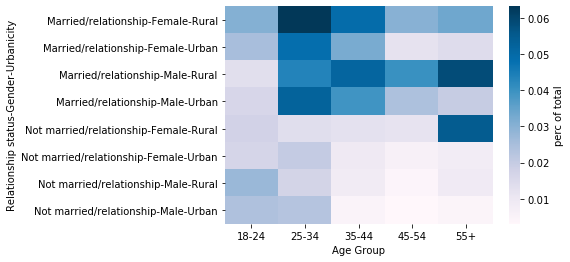

None

#### Relationship status by Gender, Education and Age Group

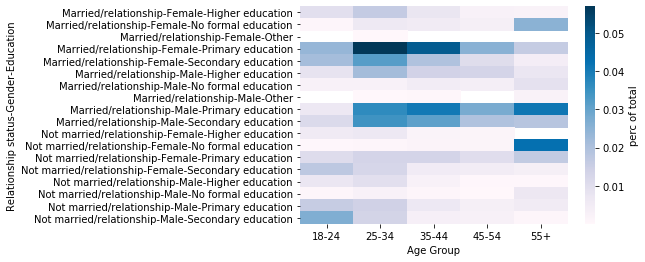

None

#### Relationship status by Gender, Region and Age Group

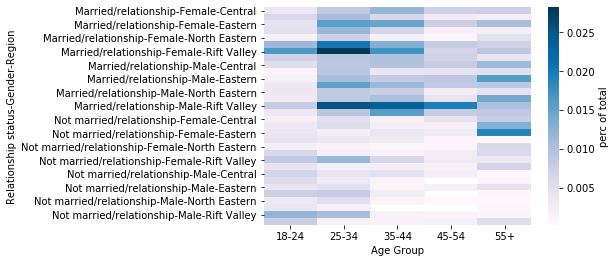

None

#### Relationship status by Gender, Province and Age Group

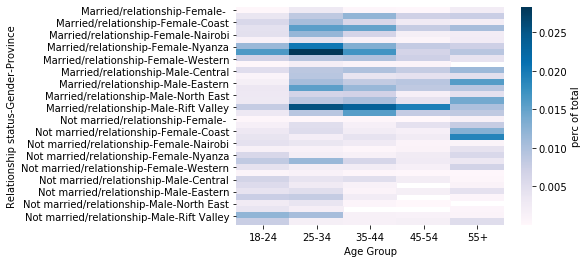

None

#### English literacy by Gender, Urbanicity and Age Group

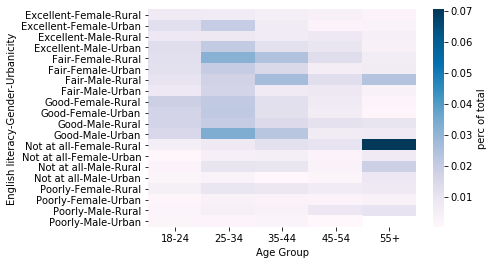

None

#### English literacy by Gender, Education and Age Group

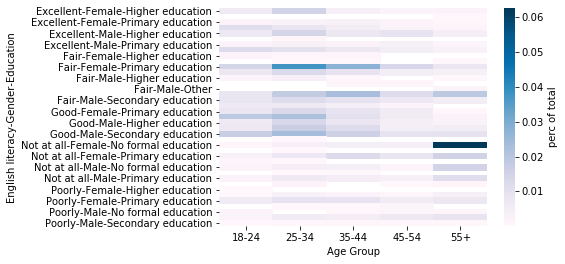

None

#### English literacy by Gender, Region and Age Group

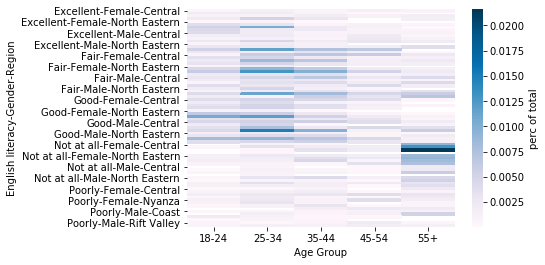

None

#### English literacy by Gender, Province and Age Group

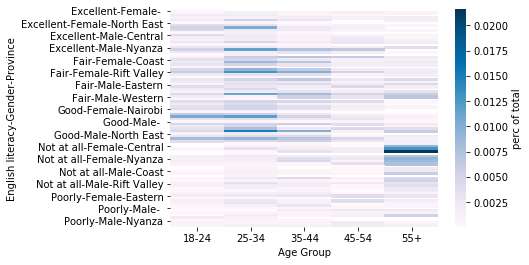

None

#### Own a phone by Gender, Urbanicity and Age Group

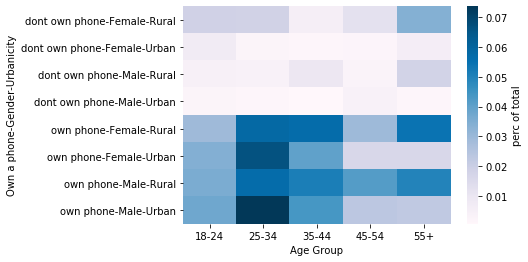

None

#### Own a phone by Gender, Education and Age Group

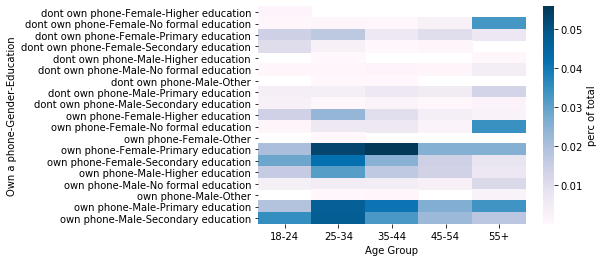

None

#### Own a phone by Gender, Region and Age Group

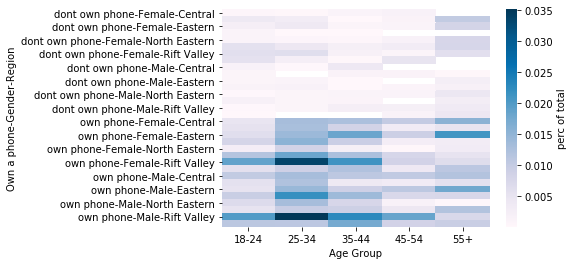

None

#### Own a phone by Gender, Province and Age Group

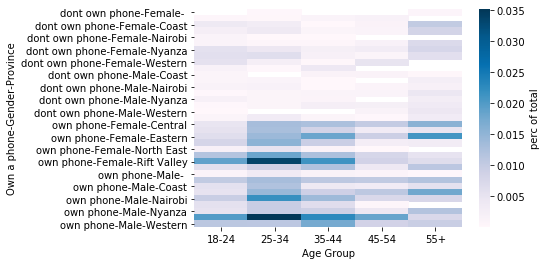

None

#### $2.50 PPP Poverty line by Gender, Urbanicity and Age Group

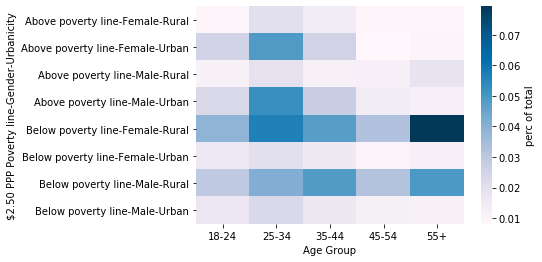

None

#### $2.50 PPP Poverty line by Gender, Education and Age Group

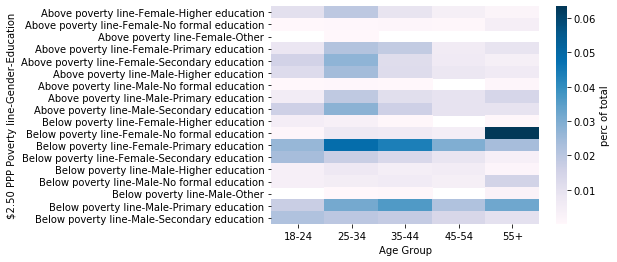

None

#### $2.50 PPP Poverty line by Gender, Region and Age Group

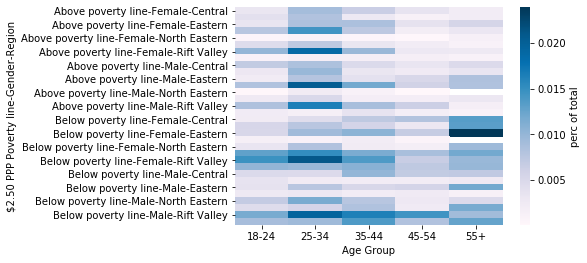

None

#### $2.50 PPP Poverty line by Gender, Province and Age Group

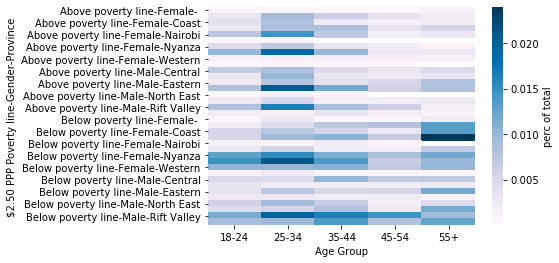

None

#### Language of interview by Gender, Urbanicity and Age Group

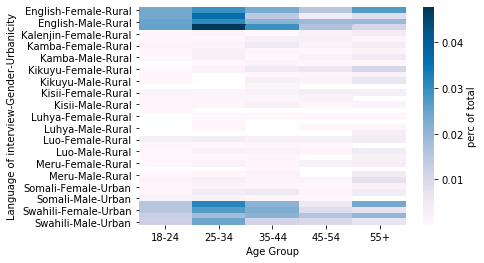

None

#### Language of interview by Gender, Education and Age Group

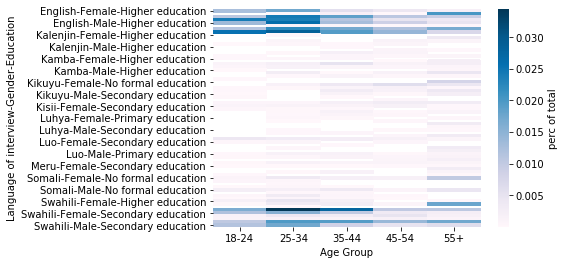

None

#### Language of interview by Gender, Region and Age Group

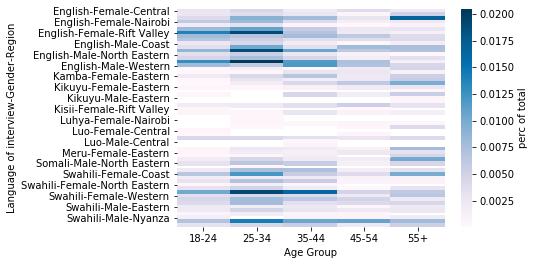

None

#### Language of interview by Gender, Province and Age Group

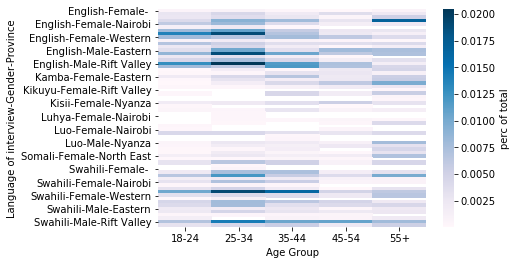

None

#### Main language by Gender, Urbanicity and Age Group

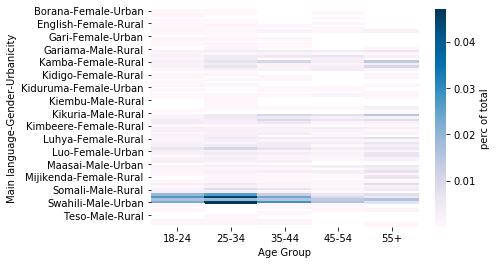

None

#### Main language by Gender, Education and Age Group

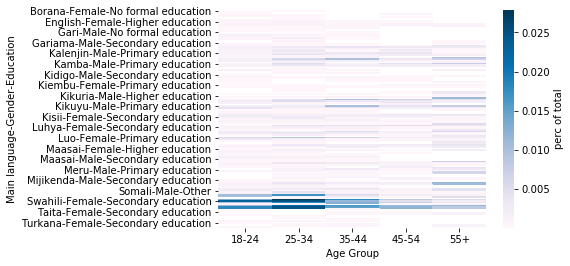

None

#### Main language by Gender, Region and Age Group

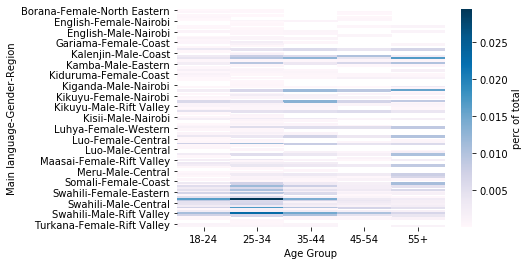

None

#### Main language by Gender, Province and Age Group

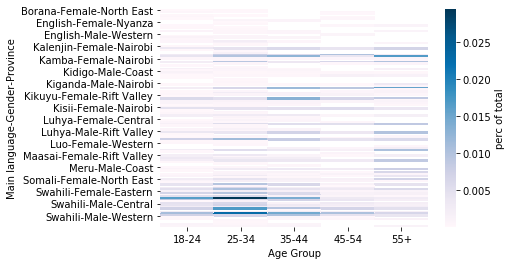

None

#### Mean household size by Gender, Urbanicity and Age Group

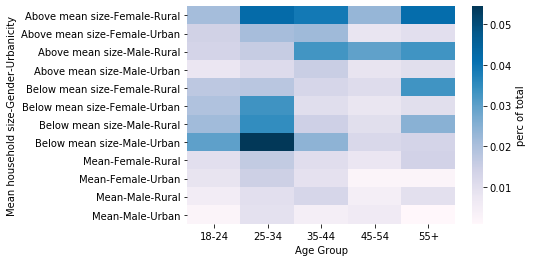

None

#### Mean household size by Gender, Education and Age Group

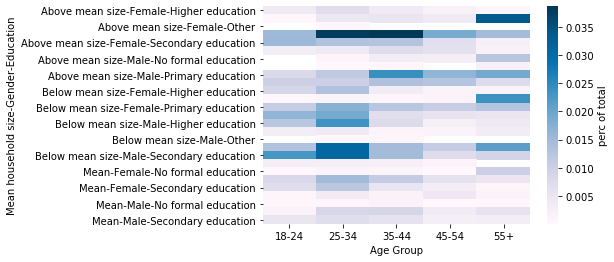

None

#### Mean household size by Gender, Region and Age Group

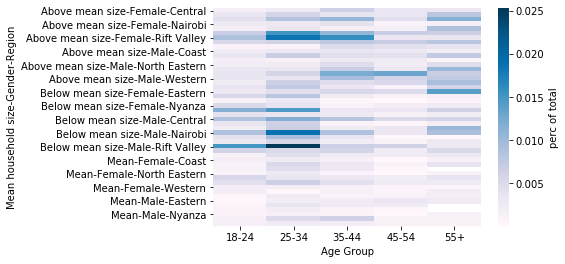

None

#### Mean household size by Gender, Province and Age Group

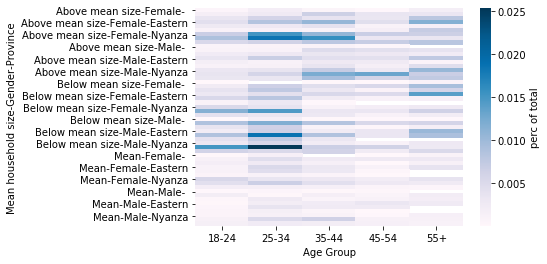

None

####  Phone ownership by Gender, Urbanicity and Age Group

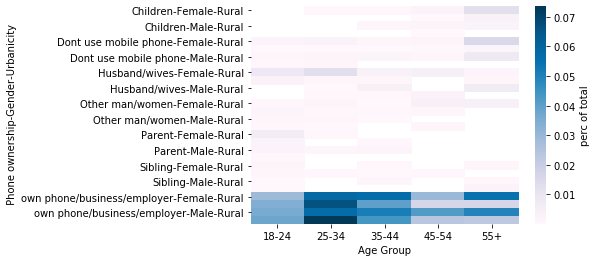

None

####  Phone ownership by Gender, Education and Age Group

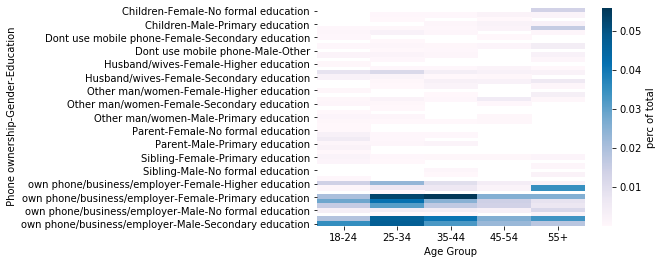

None

####  Phone ownership by Gender, Region and Age Group

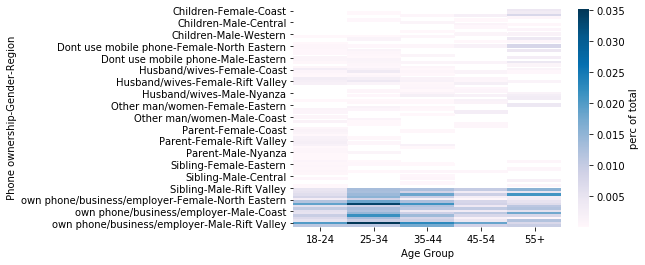

None

####  Phone ownership by Gender, Province and Age Group

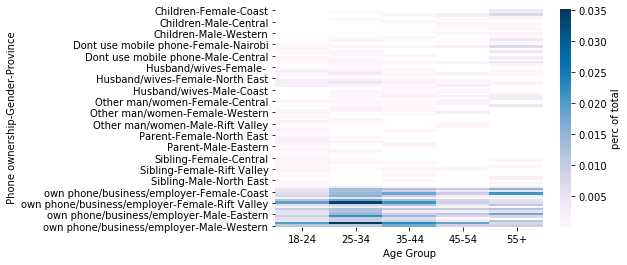

None

#### Independent phone use by Gender, Urbanicity and Age Group

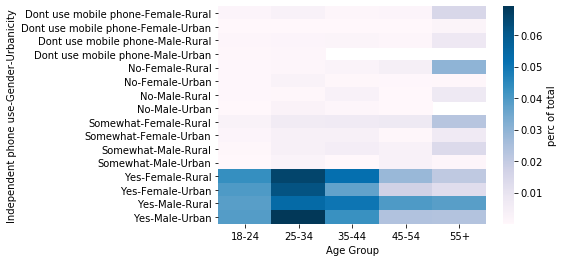

None

#### Independent phone use by Gender, Education and Age Group

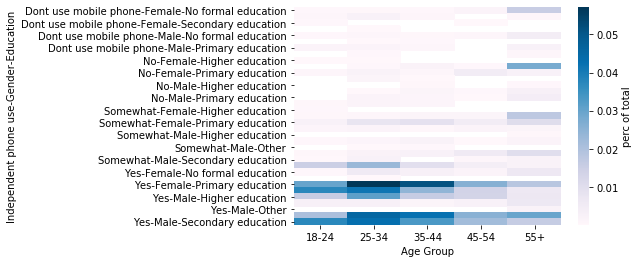

None

#### Independent phone use by Gender, Region and Age Group

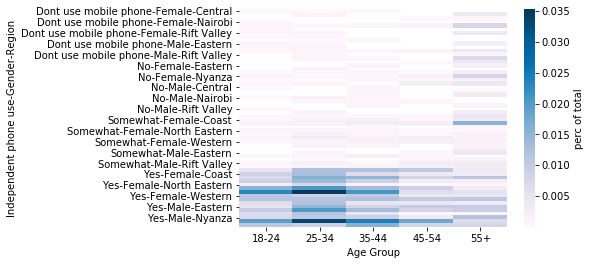

None

#### Independent phone use by Gender, Province and Age Group

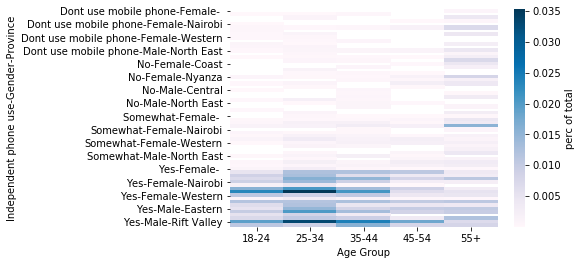

None

#### Informal financial usage by Gender, Urbanicity and Age Group

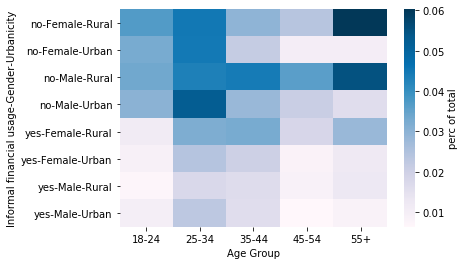

None

#### Informal financial usage by Gender, Education and Age Group

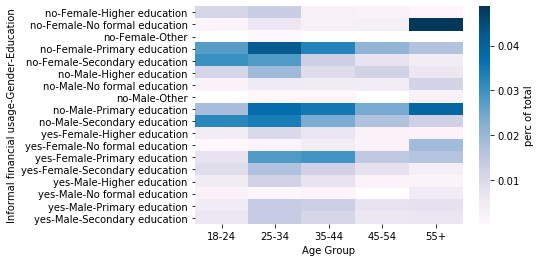

None

#### Informal financial usage by Gender, Region and Age Group

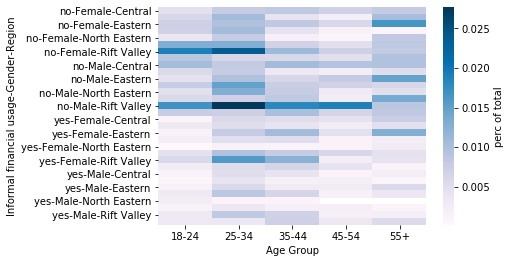

None

#### Informal financial usage by Gender, Province and Age Group

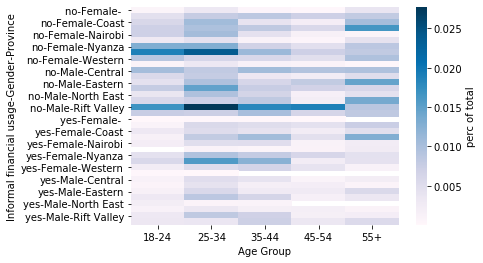

None

#### Mobile Money by Gender, Urbanicity and Age Group

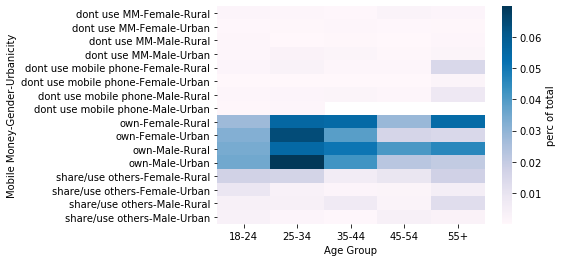

None

#### Mobile Money by Gender, Education and Age Group

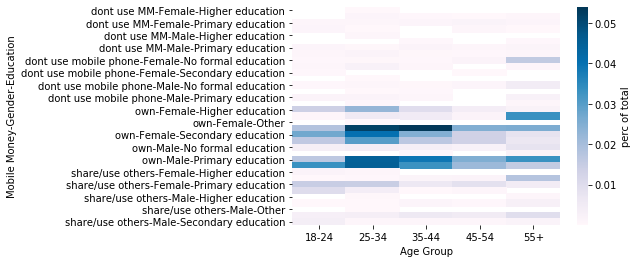

None

#### Mobile Money by Gender, Region and Age Group

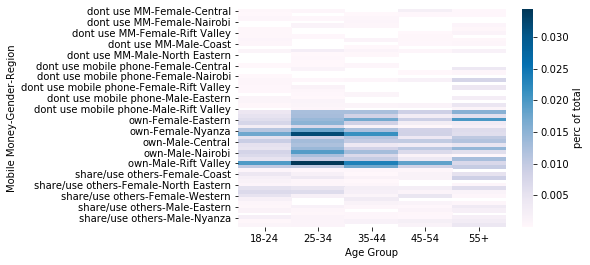

None

#### Mobile Money by Gender, Province and Age Group

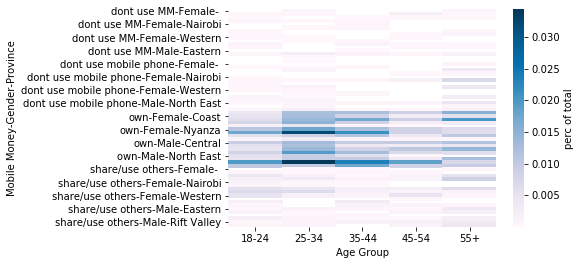

None

#### Bank by Gender, Urbanicity and Age Group

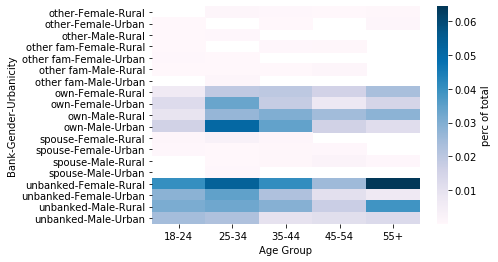

None

#### Bank by Gender, Education and Age Group

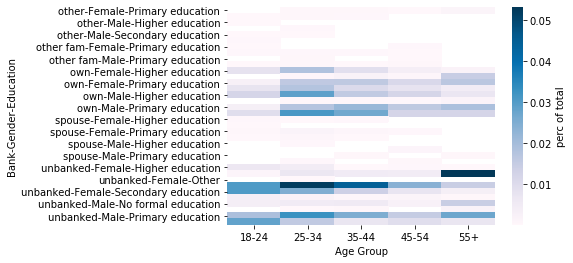

None

#### Bank by Gender, Region and Age Group

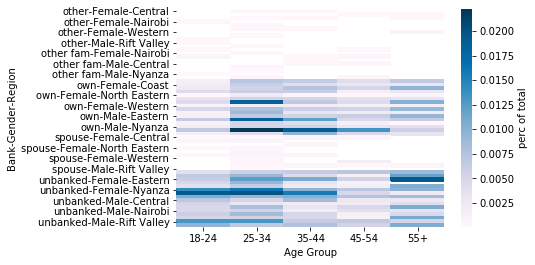

None

#### Bank by Gender, Province and Age Group

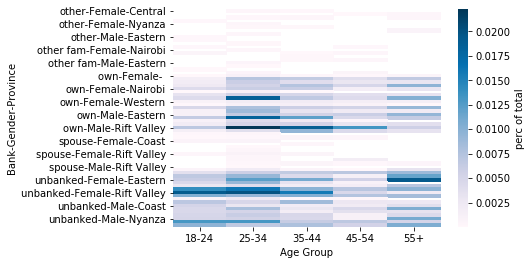

None

#### Permission to open bank by Gender, Urbanicity and Age Group

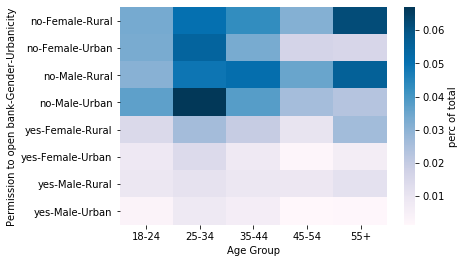

None

#### Permission to open bank by Gender, Education and Age Group

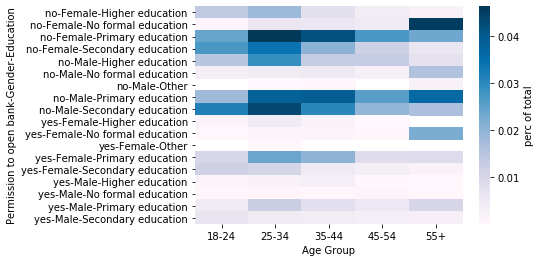

None

#### Permission to open bank by Gender, Region and Age Group

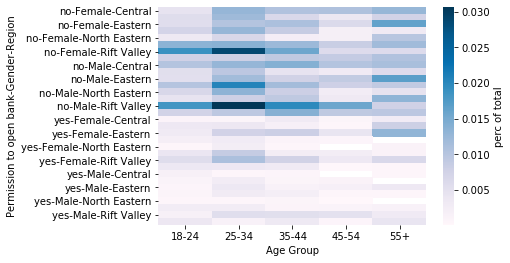

None

#### Permission to open bank by Gender, Province and Age Group

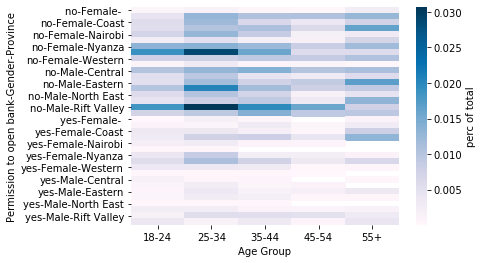

None

#### Money taken from account by Gender, Urbanicity and Age Group

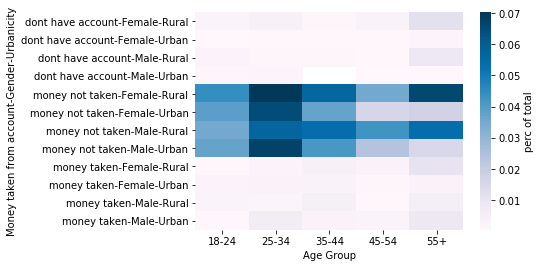

None

#### Money taken from account by Gender, Education and Age Group

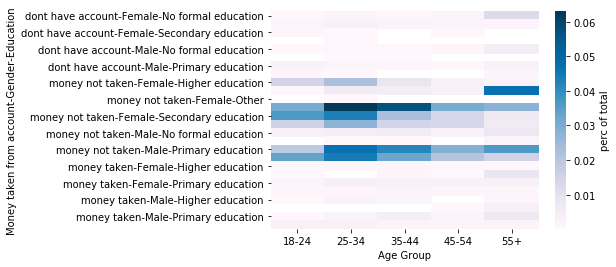

None

#### Money taken from account by Gender, Region and Age Group

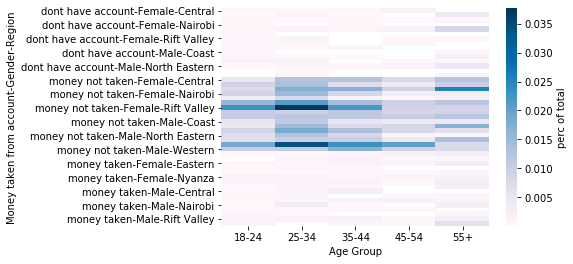

None

#### Money taken from account by Gender, Province and Age Group

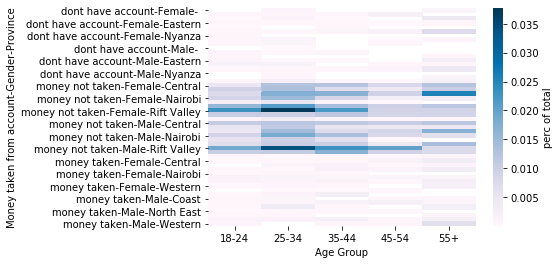

None

#### Savings goal decision maker by Gender, Urbanicity and Age Group

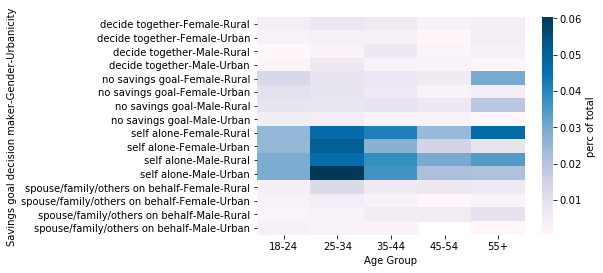

None

#### Savings goal decision maker by Gender, Education and Age Group

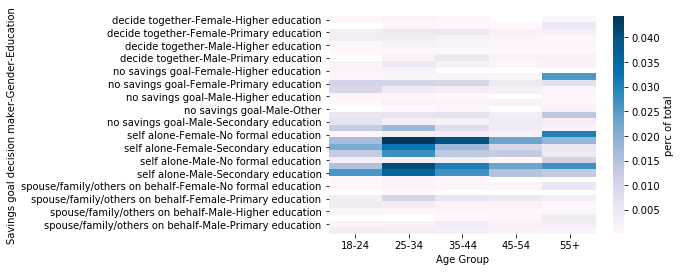

None

#### Savings goal decision maker by Gender, Region and Age Group

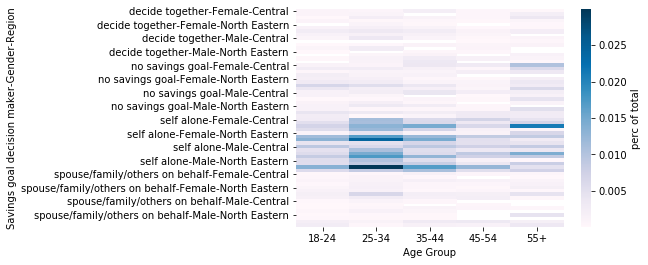

None

#### Savings goal decision maker by Gender, Province and Age Group

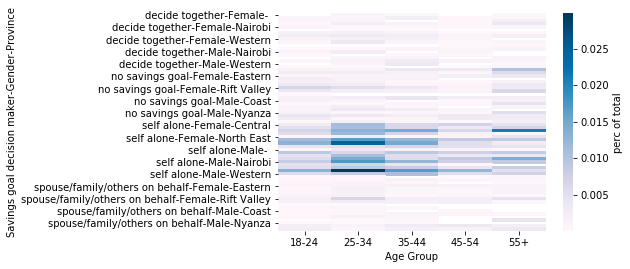

None

#### Savings goal influence by Gender, Urbanicity and Age Group

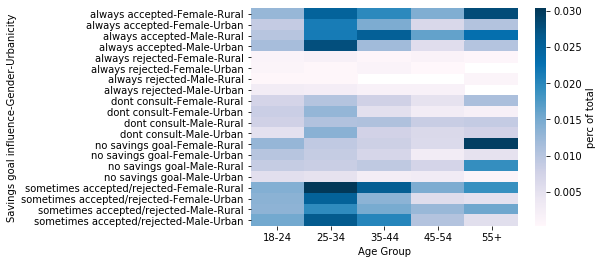

None

#### Savings goal influence by Gender, Education and Age Group

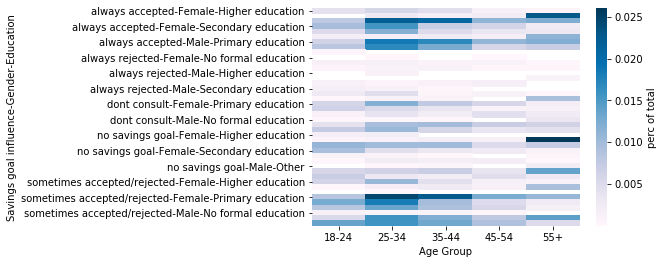

None

#### Savings goal influence by Gender, Region and Age Group

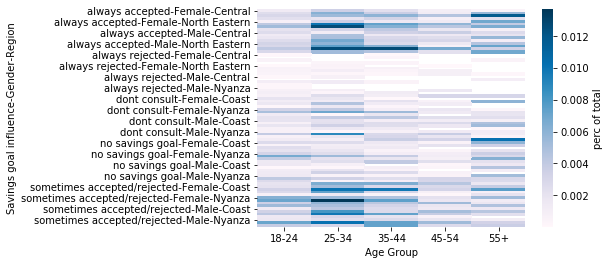

None

#### Savings goal influence by Gender, Province and Age Group

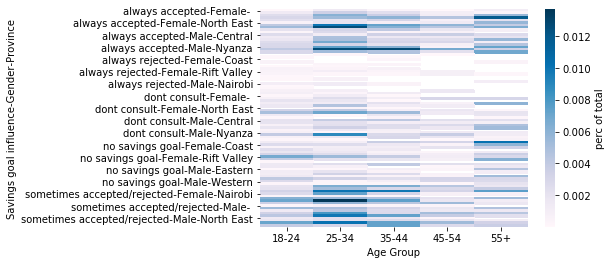

None

#### Land ownership by Gender, Urbanicity and Age Group

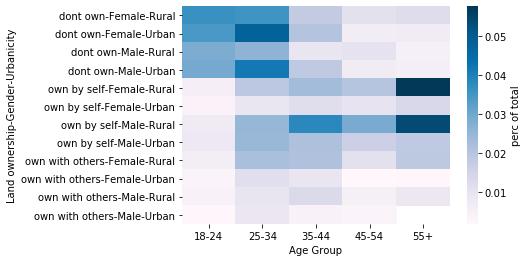

None

#### Land ownership by Gender, Education and Age Group

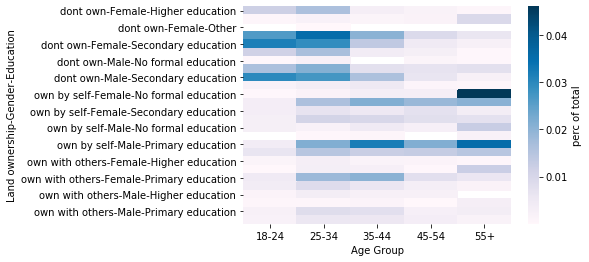

None

#### Land ownership by Gender, Region and Age Group

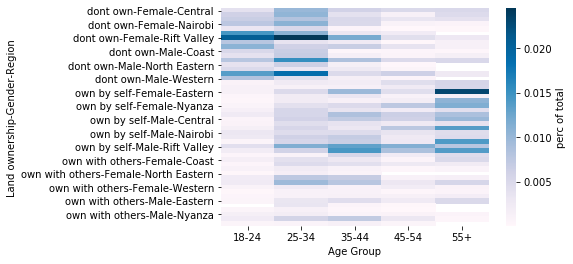

None

#### Land ownership by Gender, Province and Age Group

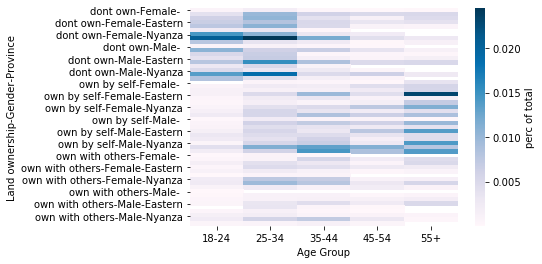

None

#### Land decision maker by Gender, Urbanicity and Age Group

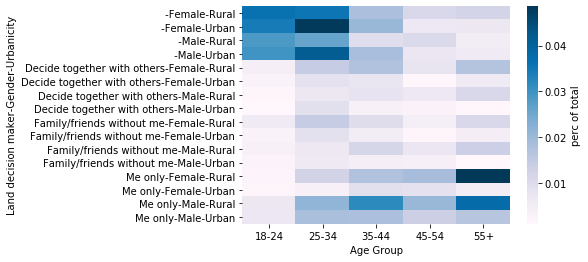

None

#### Land decision maker by Gender, Education and Age Group

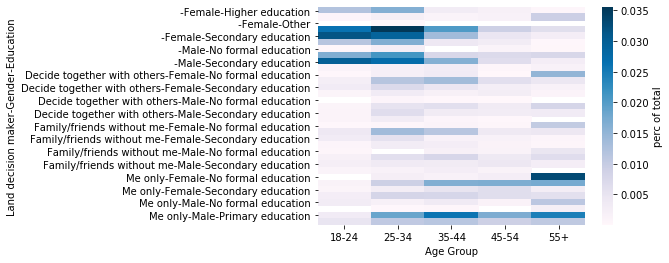

None

#### Land decision maker by Gender, Region and Age Group

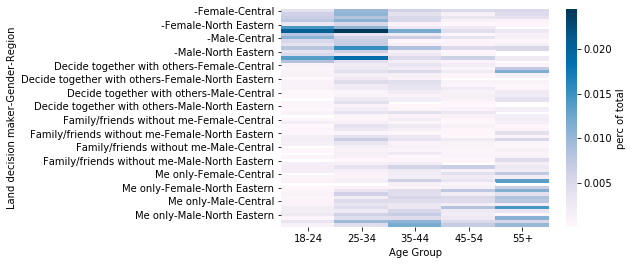

None

#### Land decision maker by Gender, Province and Age Group

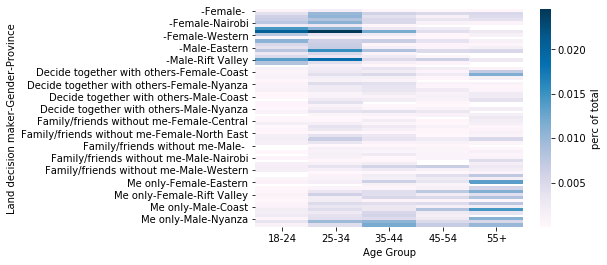

None

#### Children decision maker by Gender, Urbanicity and Age Group

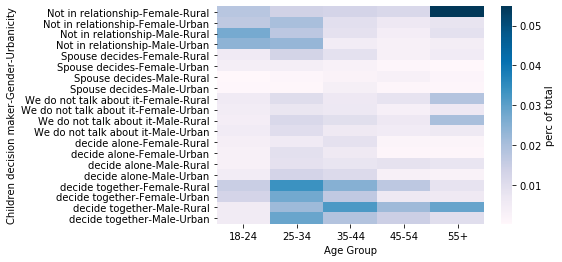

None

#### Children decision maker by Gender, Education and Age Group

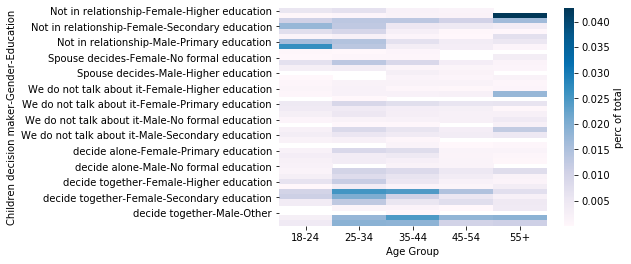

None

#### Children decision maker by Gender, Region and Age Group

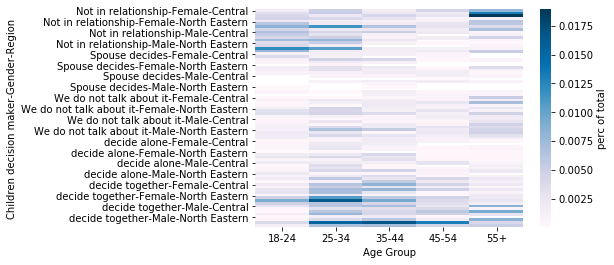

None

#### Children decision maker by Gender, Province and Age Group

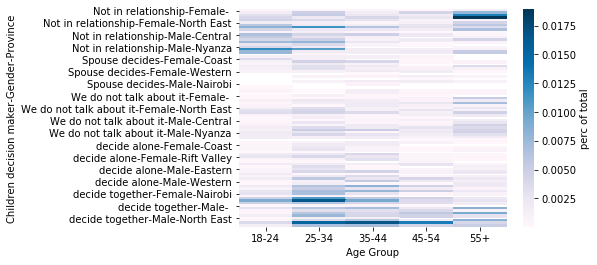

None

#### Earning frequency by Gender, Urbanicity and Age Group

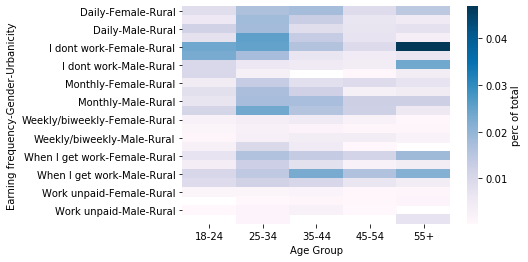

None

#### Earning frequency by Gender, Education and Age Group

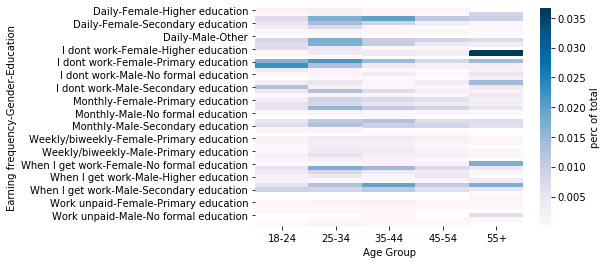

None

#### Earning frequency by Gender, Region and Age Group

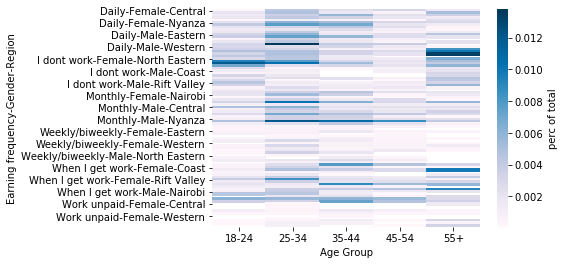

None

#### Earning frequency by Gender, Province and Age Group

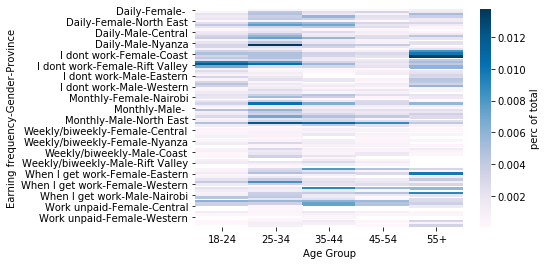

None

#### Spending decision maker by Gender, Urbanicity and Age Group

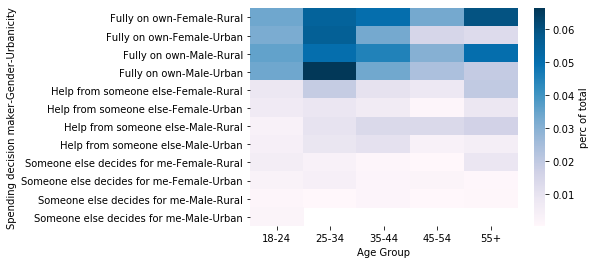

None

#### Spending decision maker by Gender, Education and Age Group

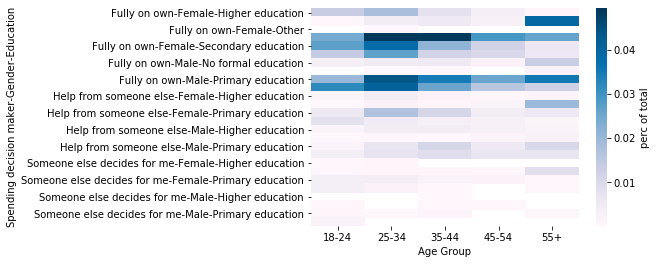

None

#### Spending decision maker by Gender, Region and Age Group

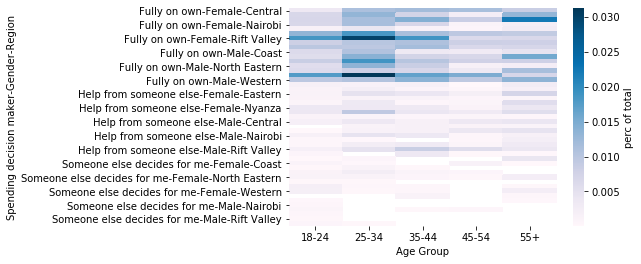

None

#### Spending decision maker by Gender, Province and Age Group

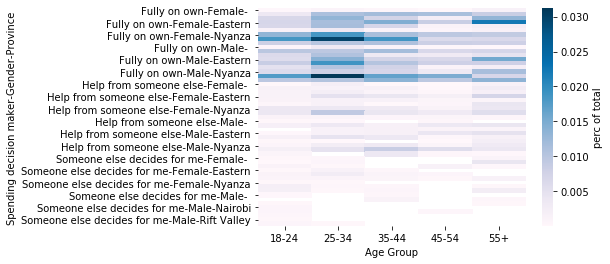

None

#### Permission to work by Gender, Urbanicity and Age Group

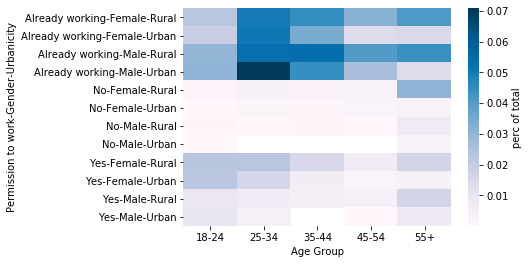

None

#### Permission to work by Gender, Education and Age Group

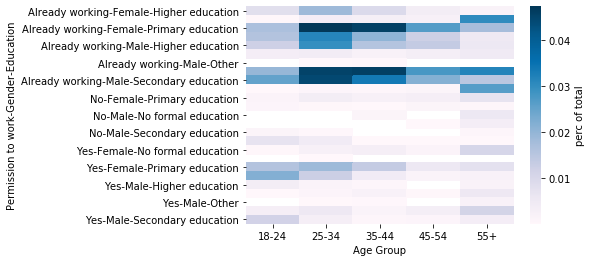

None

#### Permission to work by Gender, Region and Age Group

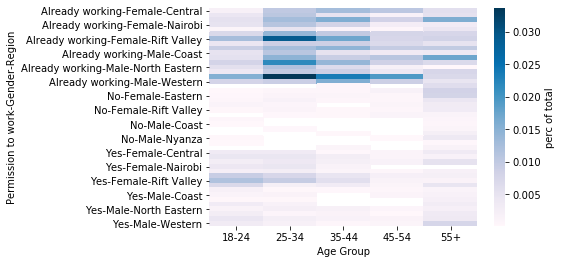

None

#### Permission to work by Gender, Province and Age Group

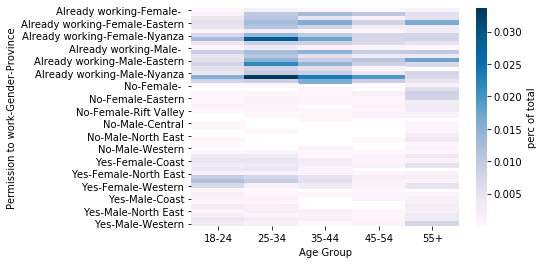

None

#### Main income earner by Gender, Urbanicity and Age Group

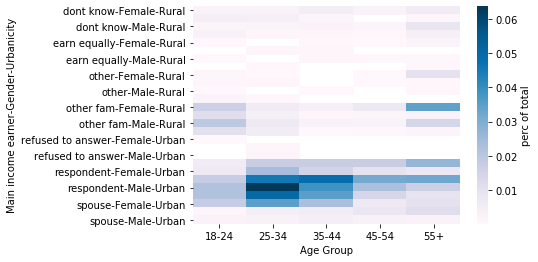

None

#### Main income earner by Gender, Education and Age Group

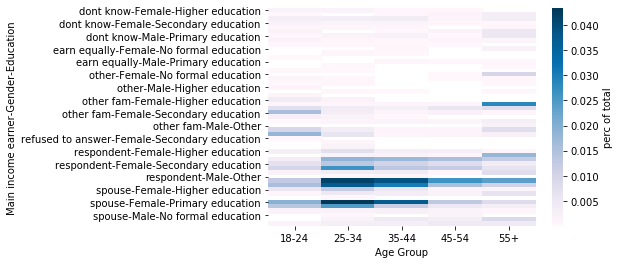

None

#### Main income earner by Gender, Region and Age Group

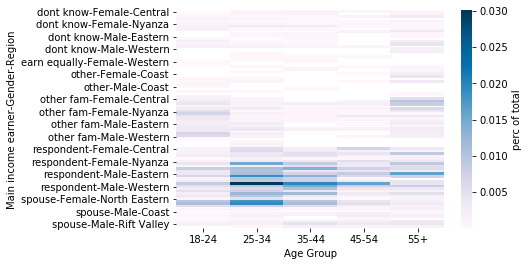

None

#### Main income earner by Gender, Province and Age Group

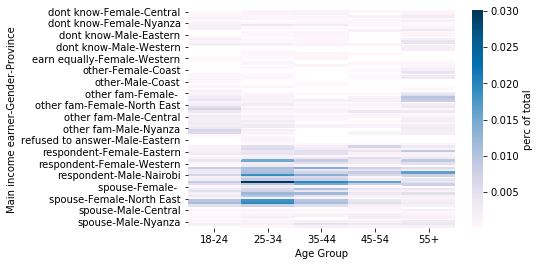

None

#### Migrant worker identity by Gender, Urbanicity and Age Group

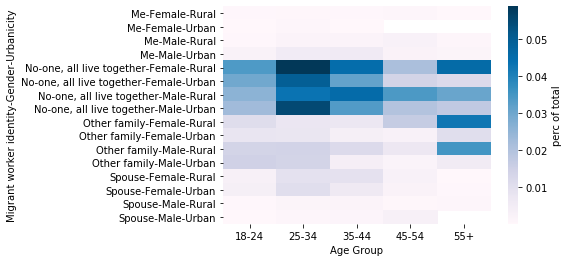

None

#### Migrant worker identity by Gender, Education and Age Group

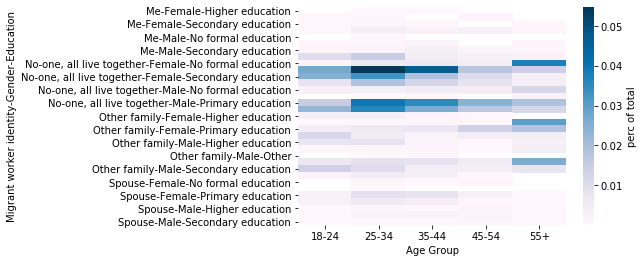

None

#### Migrant worker identity by Gender, Region and Age Group

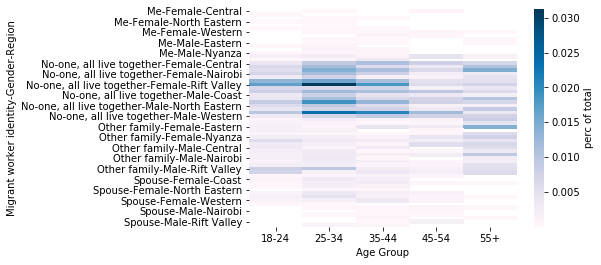

None

#### Migrant worker identity by Gender, Province and Age Group

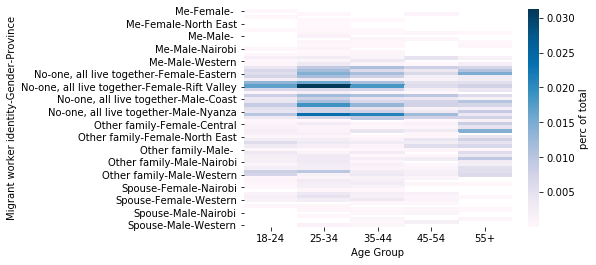

None

#### Possibility to raise 1/20 GNI (Gross National Income) by Gender, Urbanicity and Age Group

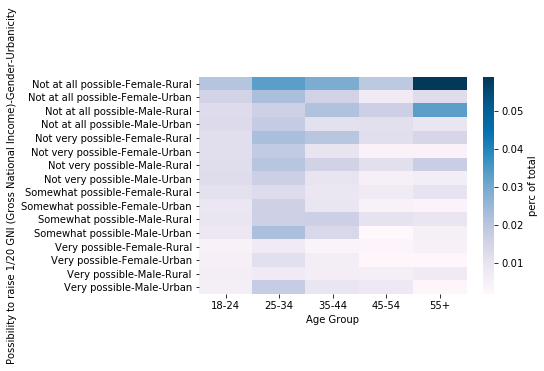

None

#### Possibility to raise 1/20 GNI (Gross National Income) by Gender, Education and Age Group

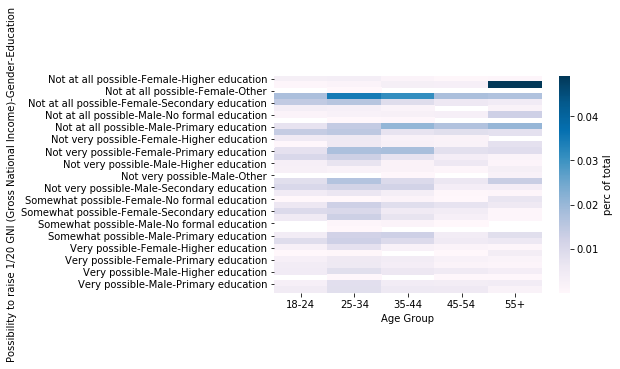

None

#### Possibility to raise 1/20 GNI (Gross National Income) by Gender, Region and Age Group

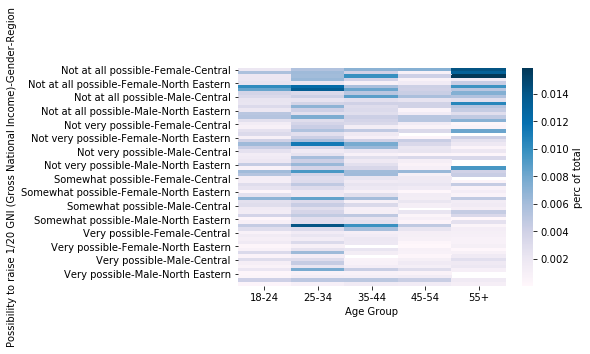

None

#### Possibility to raise 1/20 GNI (Gross National Income) by Gender, Province and Age Group

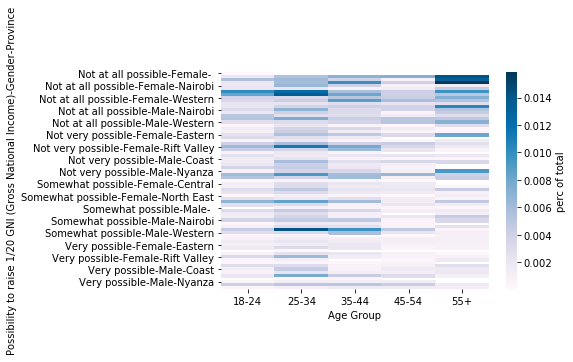

None

#### Income frequency of spouse by Gender, Urbanicity and Age Group

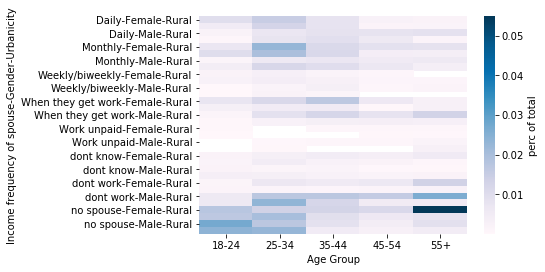

None

#### Income frequency of spouse by Gender, Education and Age Group

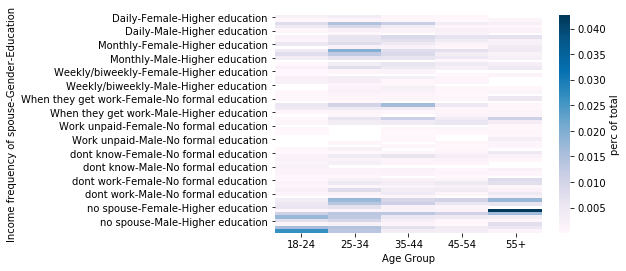

None

#### Income frequency of spouse by Gender, Region and Age Group

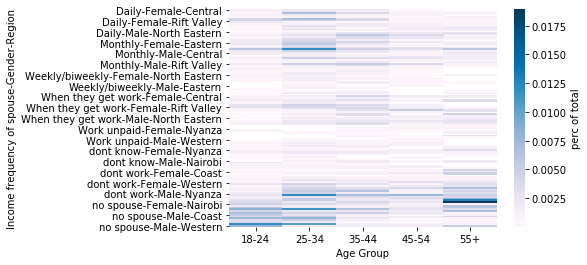

None

#### Income frequency of spouse by Gender, Province and Age Group

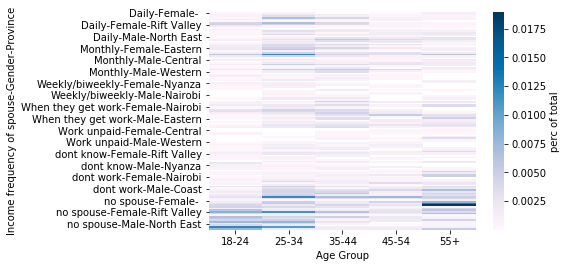

None

#### Allow spouse to work,, by Gender, Urbanicity and Age Group

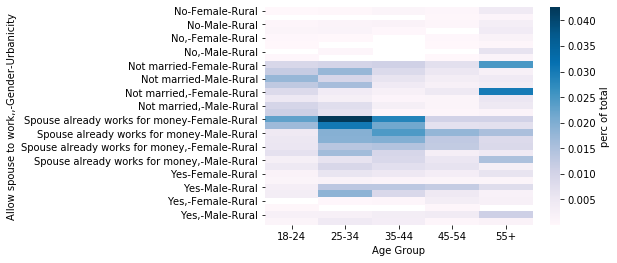

None

#### Allow spouse to work,, by Gender, Education and Age Group

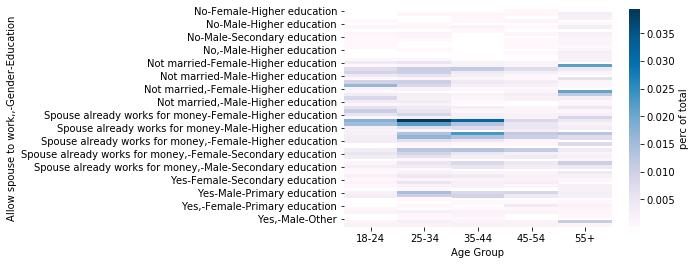

None

#### Allow spouse to work,, by Gender, Region and Age Group

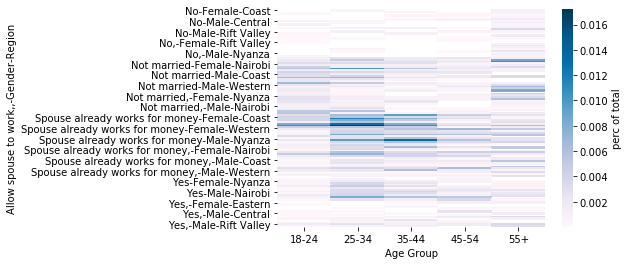

None

#### Allow spouse to work,, by Gender, Province and Age Group

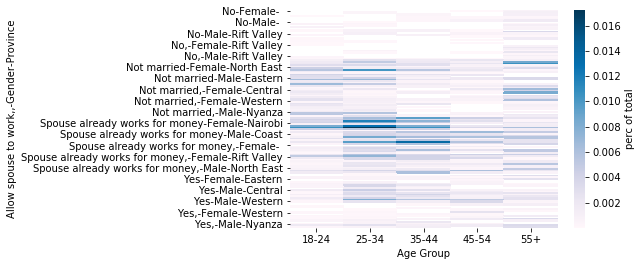

None

In [11]:
indColsLabel = ['Relationship status', 'English literacy',
       'Own a phone', '$2.50 PPP Poverty line', 'Language of interview',
       'Main language', 'Mean household size', 
       ' Phone ownership', 'Independent phone use', 'Informal financial usage',
       'Mobile Money', 'Bank', 'Permission to open bank',
       'Money taken from account', 'Savings goal decision maker',
       'Savings goal influence', 'Land ownership', 'Land decision maker',
       'Children decision maker', 'Earning frequency',
       'Spending decision maker', 'Permission to work', 'Main income earner',
       'Migrant worker identity',
       'Possibility to raise 1/20 GNI (Gross National Income)',
       'Income frequency of spouse', 'Allow spouse to work,,']
def plotHeatmap(column, ind):
    ig, axes = plt.subplots()
    valuesL = datasetLabeled.groupby([column,'Gender',ind,'Age Group'])['finalweight'].agg(**{
                                    'sum': pd.NamedAgg(column='finalweight', aggfunc=sum)})
    valuesL['percentage'] = valuesL['sum']/valuesL['sum'].sum()
    
    g = sns.heatmap(valuesL.unstack(3)['percentage'], cmap="PuBu", annot=False, cbar_kws={'label': 'perc of total', 'orientation': 'vertical'})
    display(Markdown(f'#### {column} by Gender, {ind} and Age Group'))
    return display(plt.show())

for column in indColsLabel:
    plotHeatmap(column, 'Urbanicity')
    plotHeatmap(column, 'Education')
    plotHeatmap(column, 'Region')
    plotHeatmap(column, 'Province')

#### Relationship status by gender and expanded to Age Group

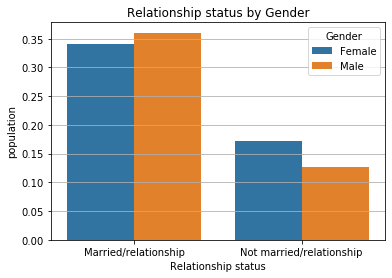

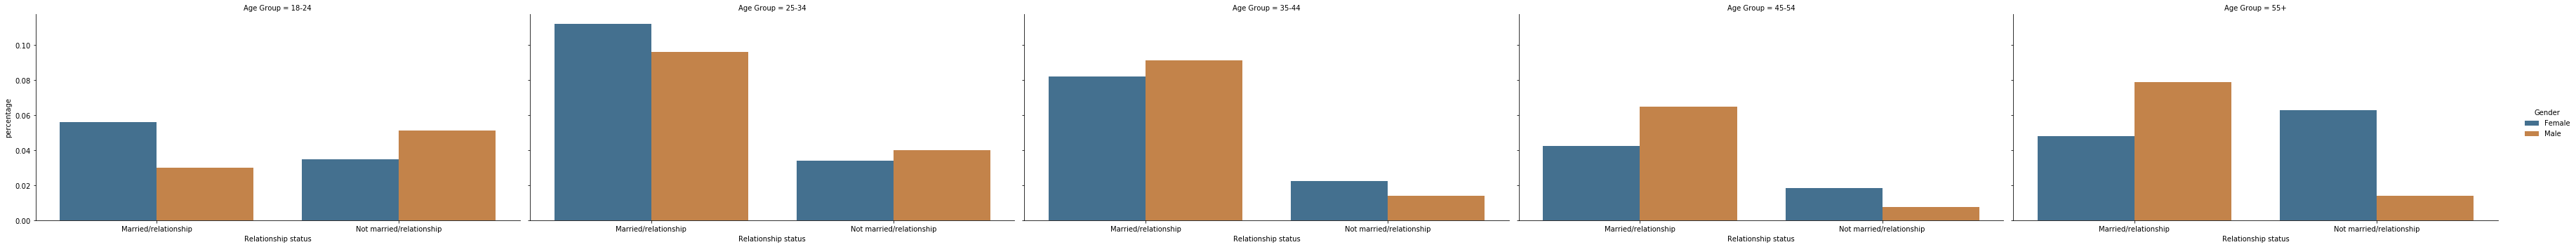

None

#### Urbanicity by gender and expanded to Age Group

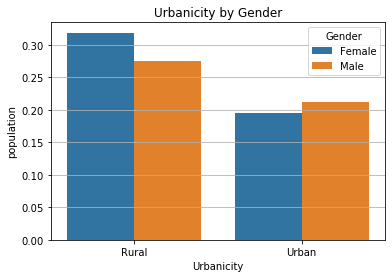

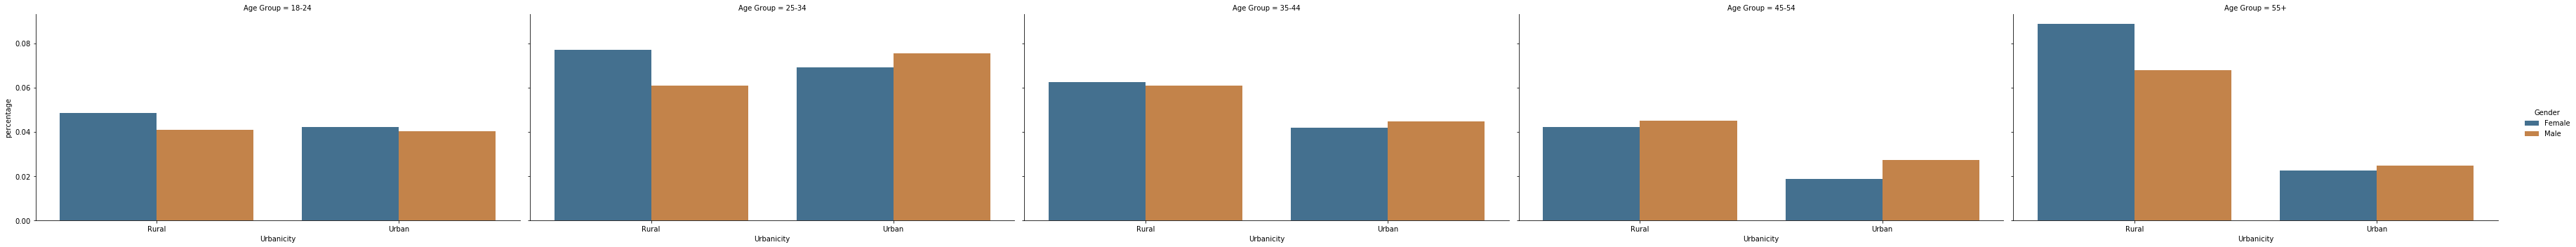

None

#### Education by gender and expanded to Age Group

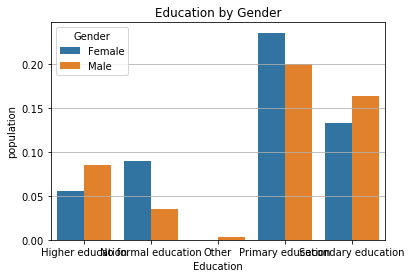

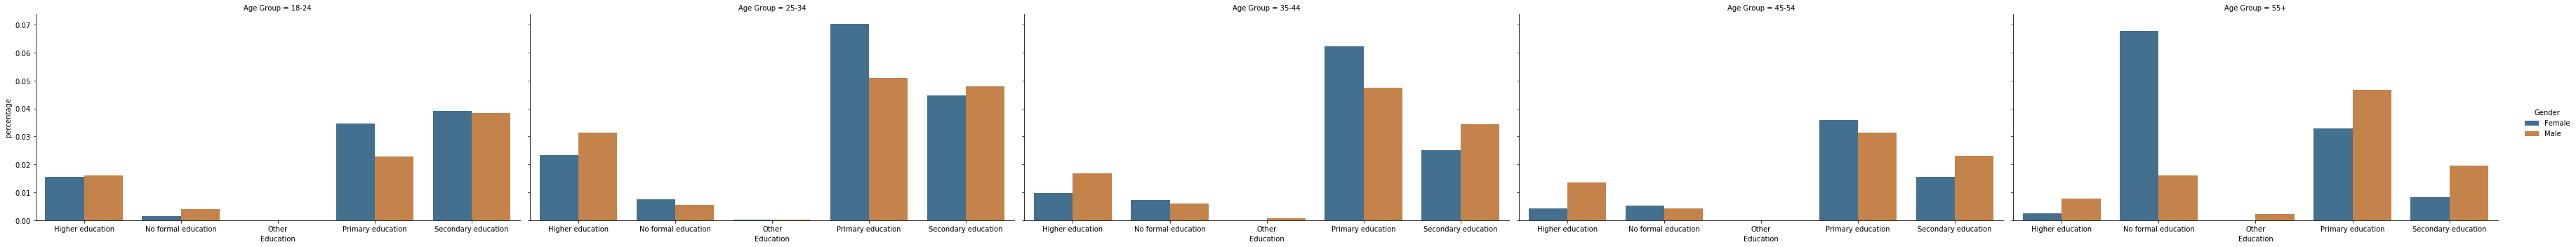

None

#### English literacy by gender and expanded to Age Group

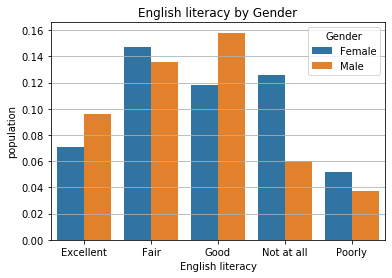

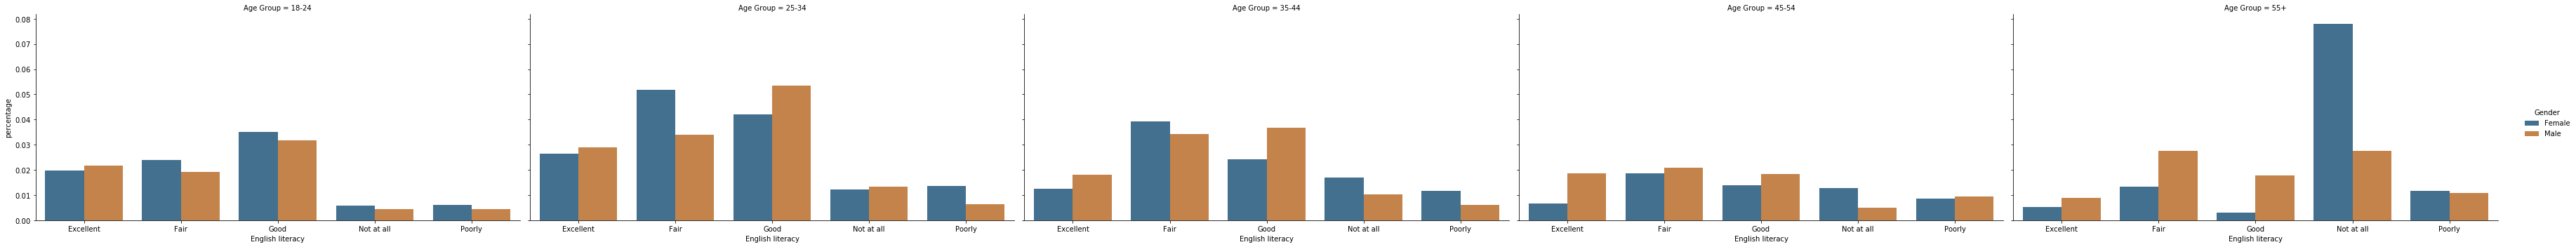

None

#### Own a phone by gender and expanded to Age Group

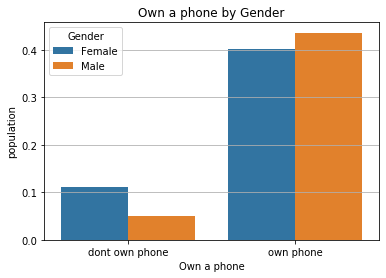

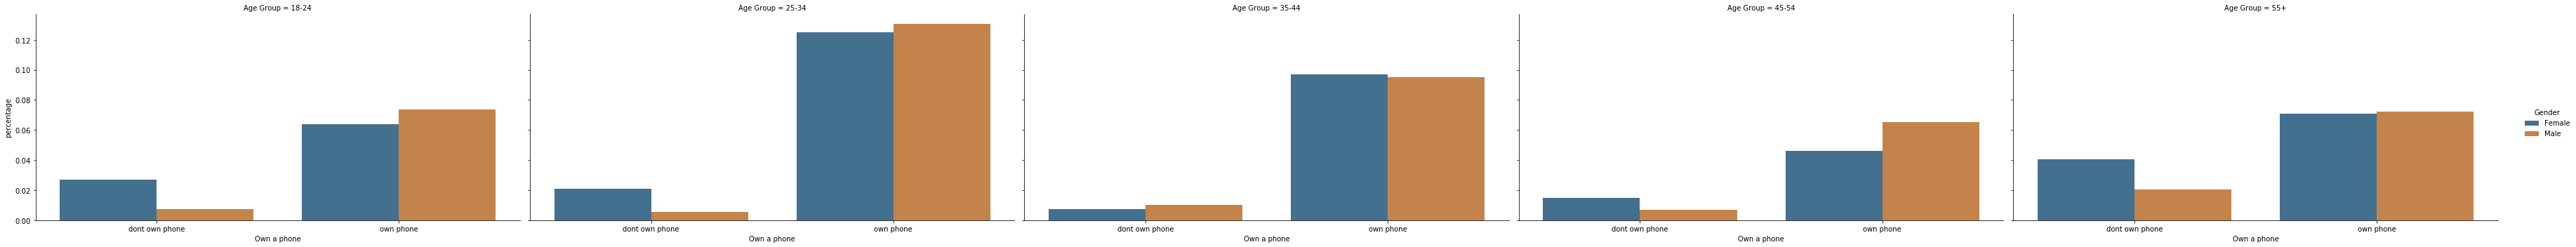

None

#### $2.50 PPP Poverty line by gender and expanded to Age Group

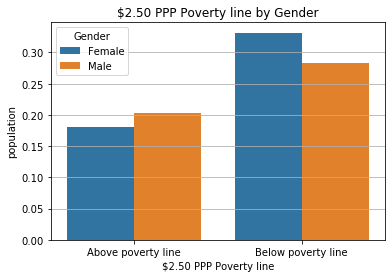

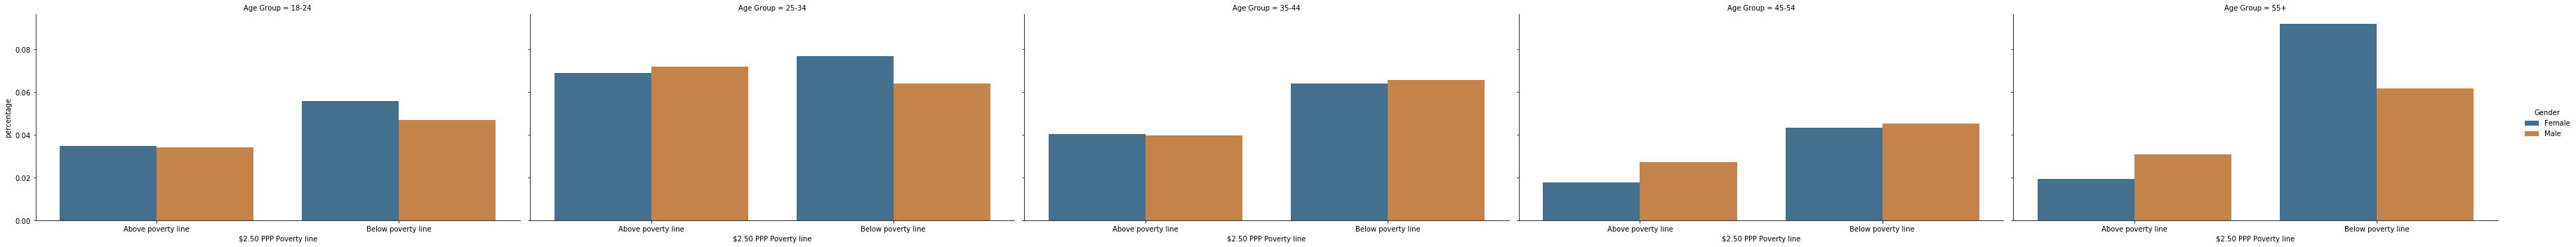

None

#### Language of interview by gender and expanded to Age Group

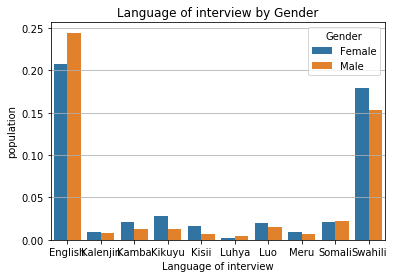

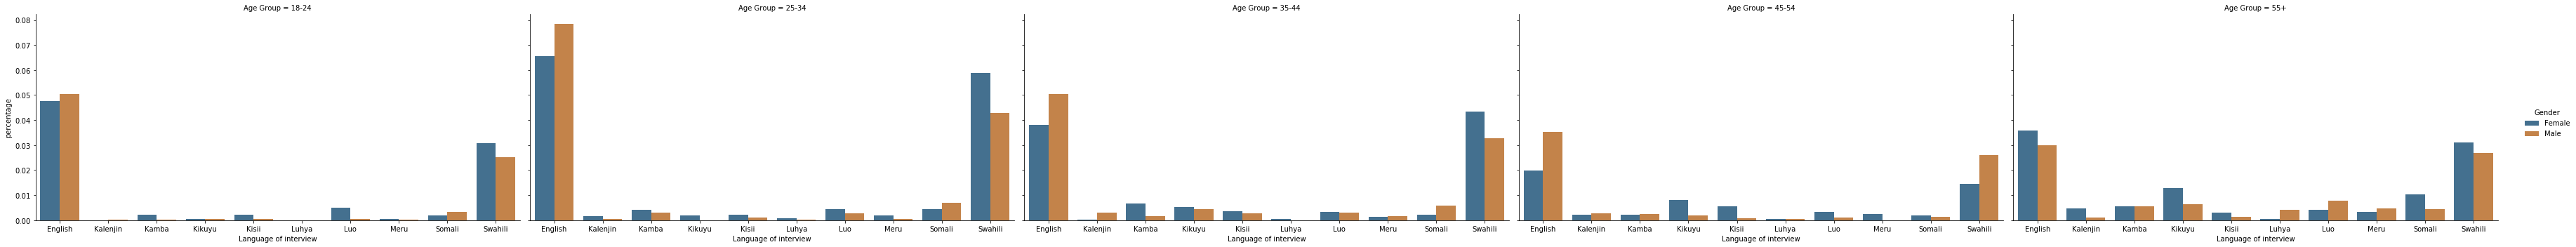

None

#### Main language by gender and expanded to Age Group

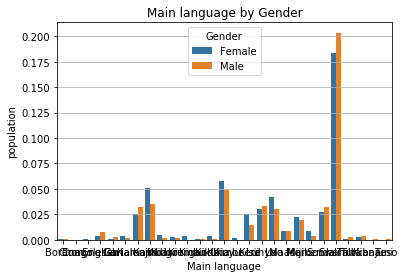

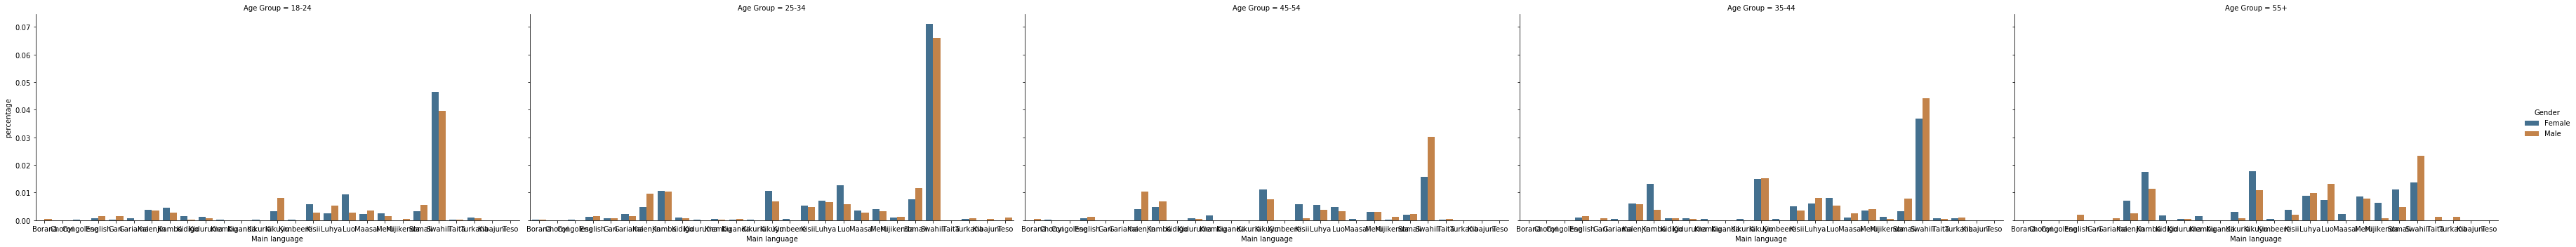

None

#### Mean household size by gender and expanded to Age Group

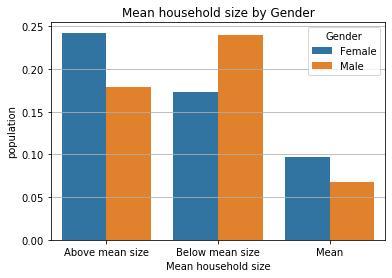

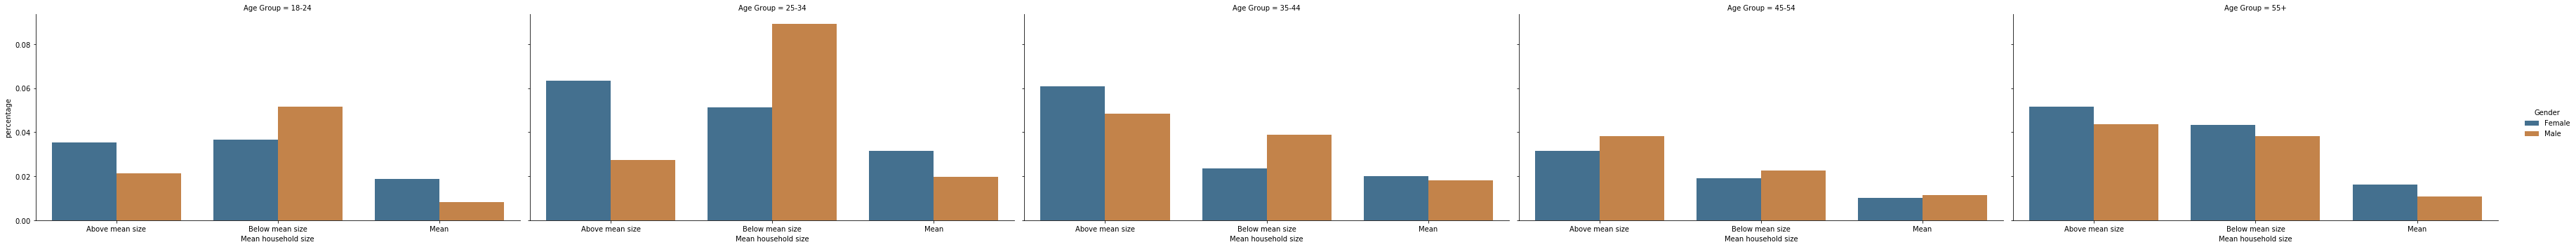

None

#### Region by gender and expanded to Age Group

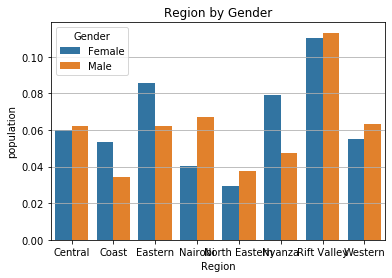

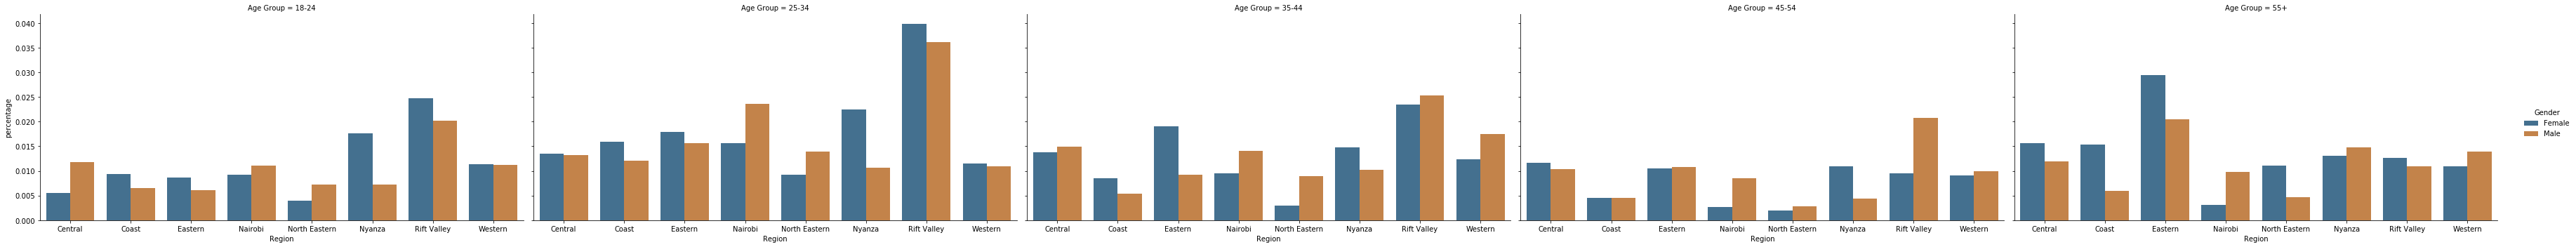

None

#### Province by gender and expanded to Age Group

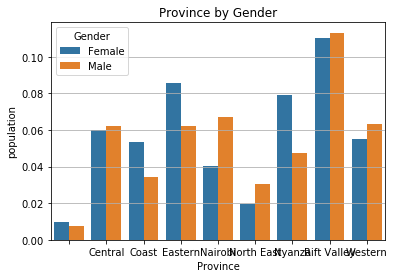

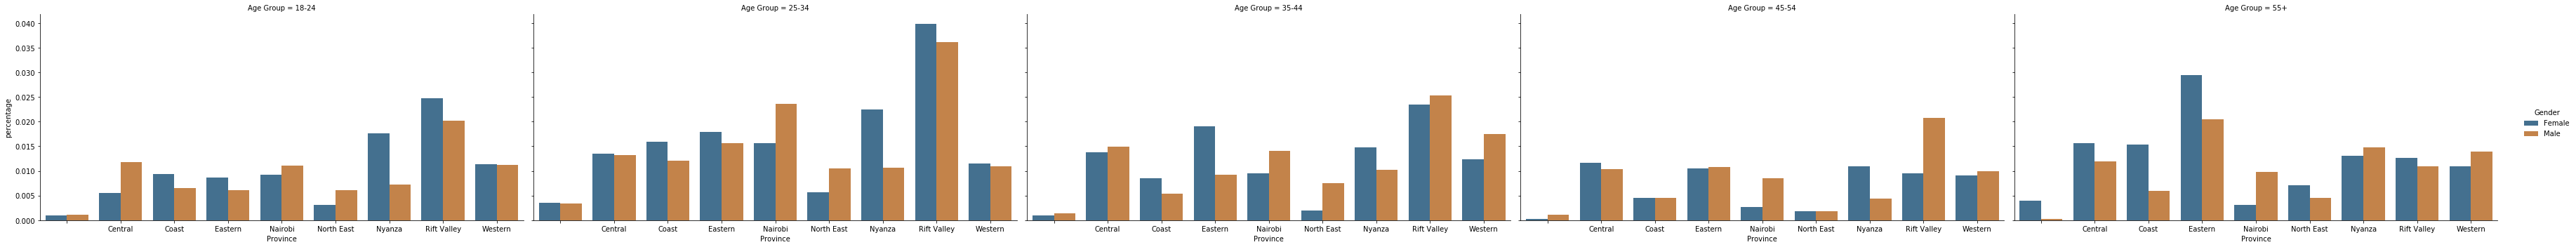

None

####  Phone ownership by gender and expanded to Age Group

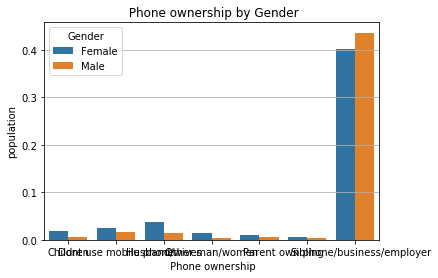

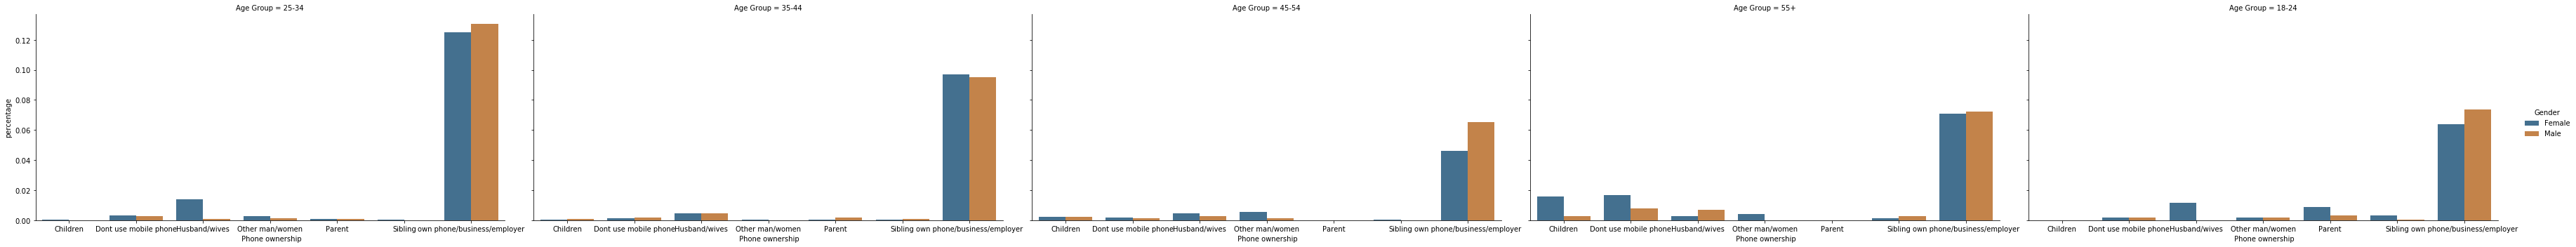

None

#### Independent phone use by gender and expanded to Age Group

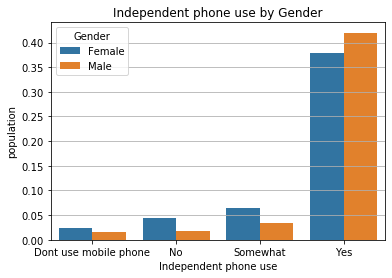

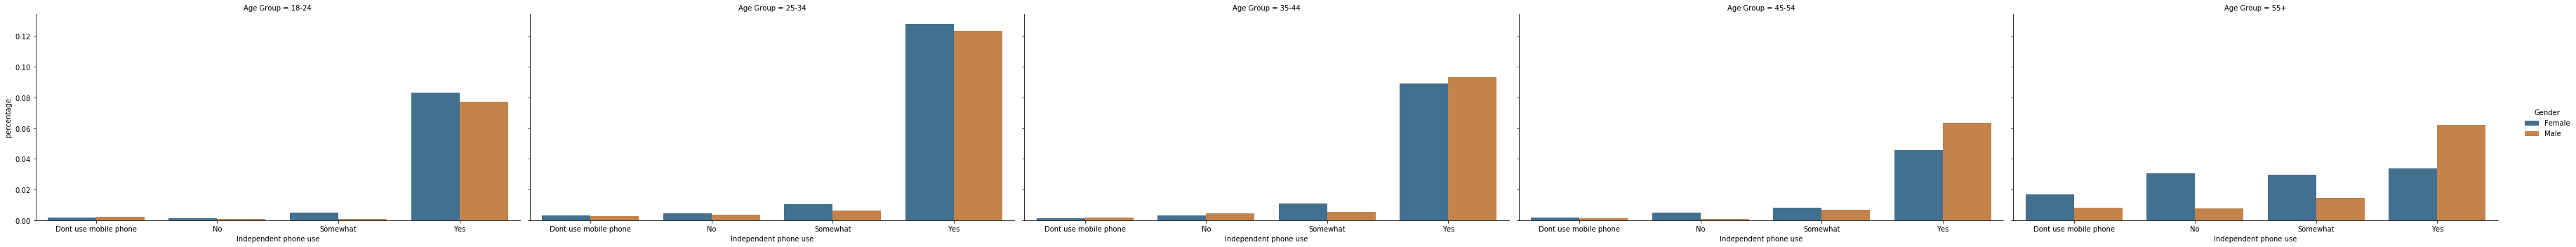

None

#### Informal financial usage by gender and expanded to Age Group

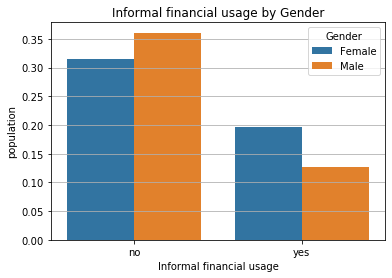

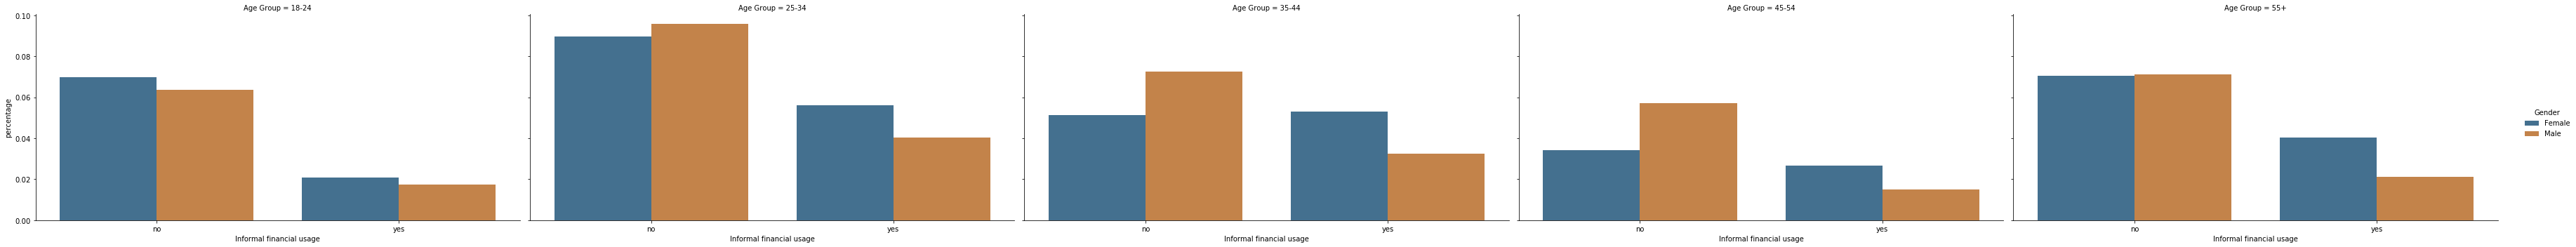

None

#### Mobile Money by gender and expanded to Age Group

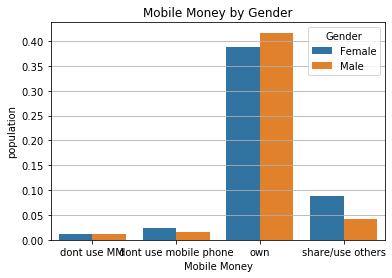

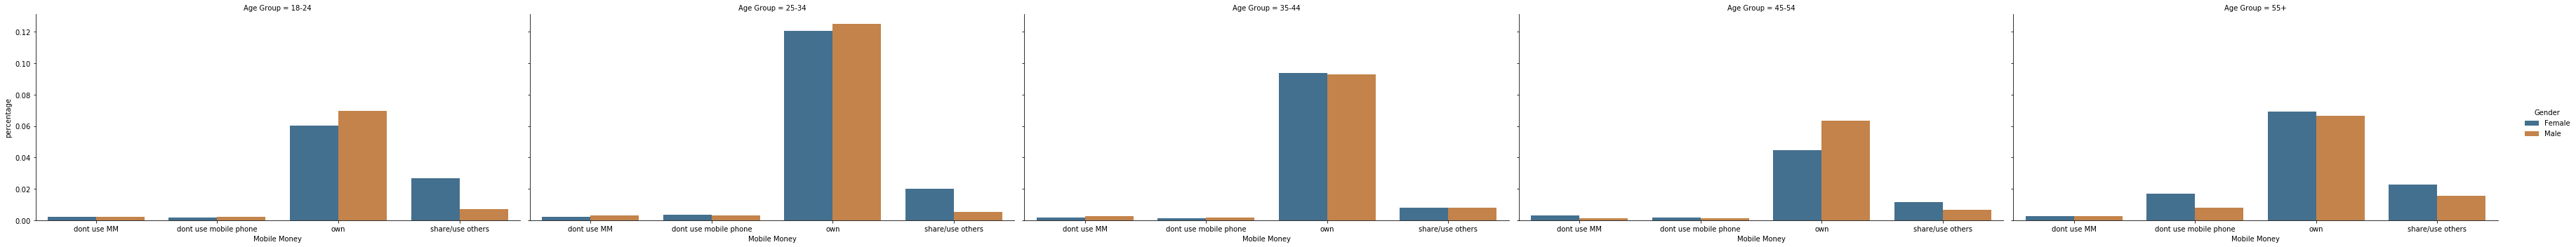

None

#### Bank by gender and expanded to Age Group

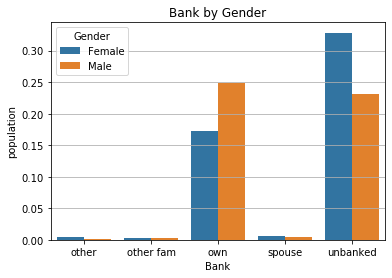

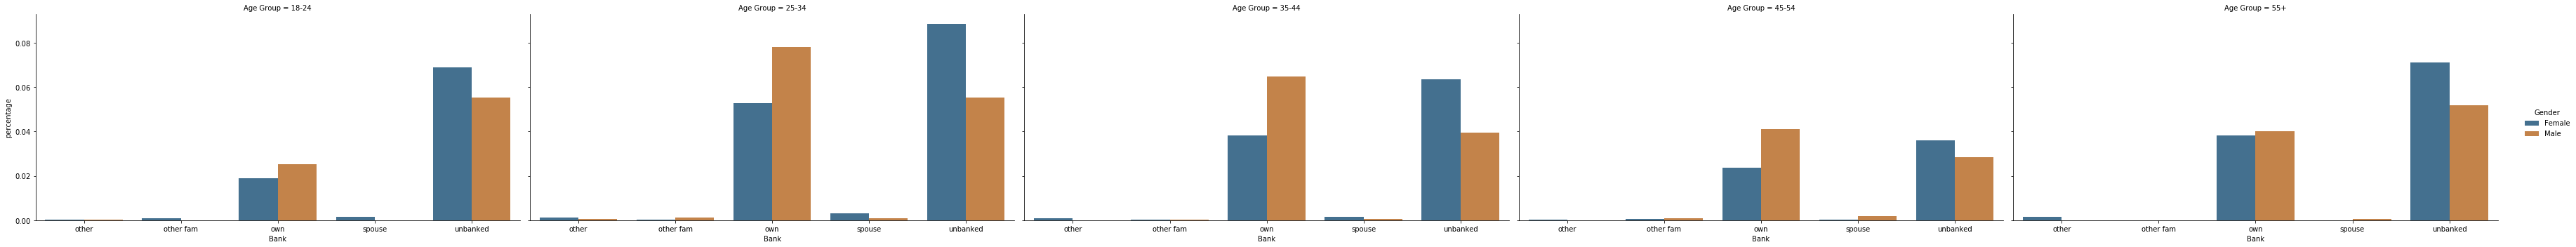

None

#### Permission to open bank by gender and expanded to Age Group

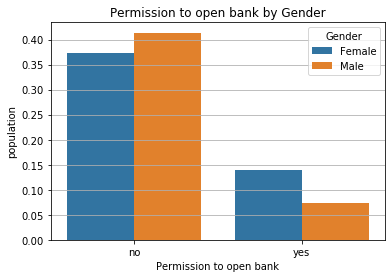

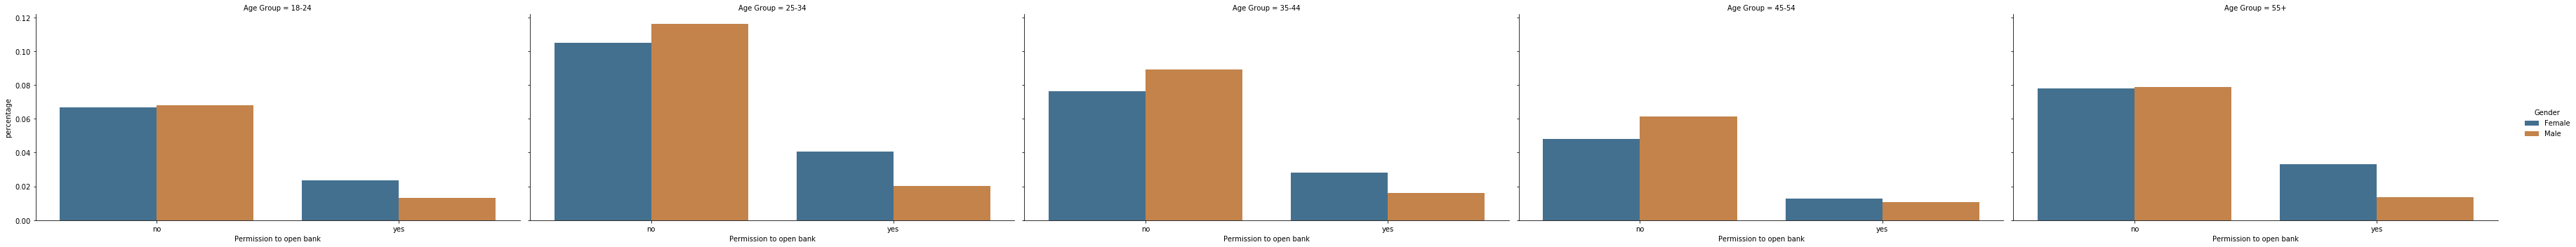

None

#### Money taken from account by gender and expanded to Age Group

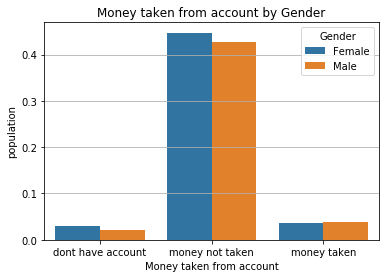

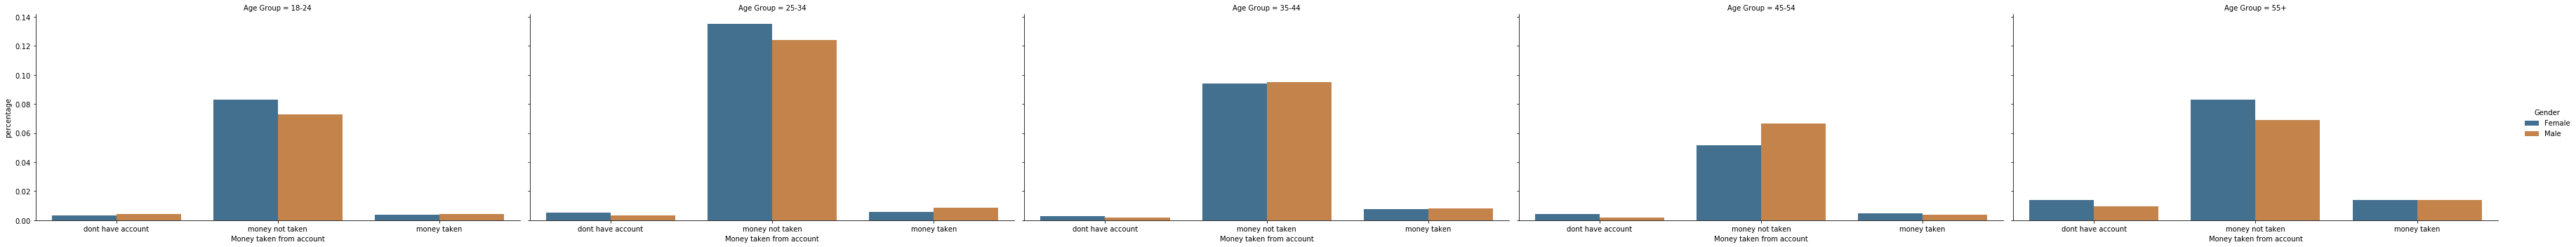

None

#### Savings goal decision maker by gender and expanded to Age Group

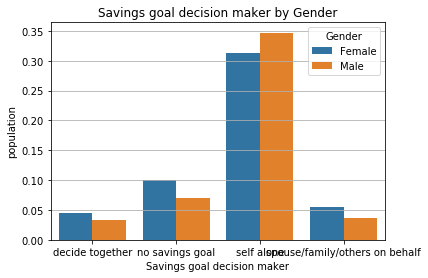

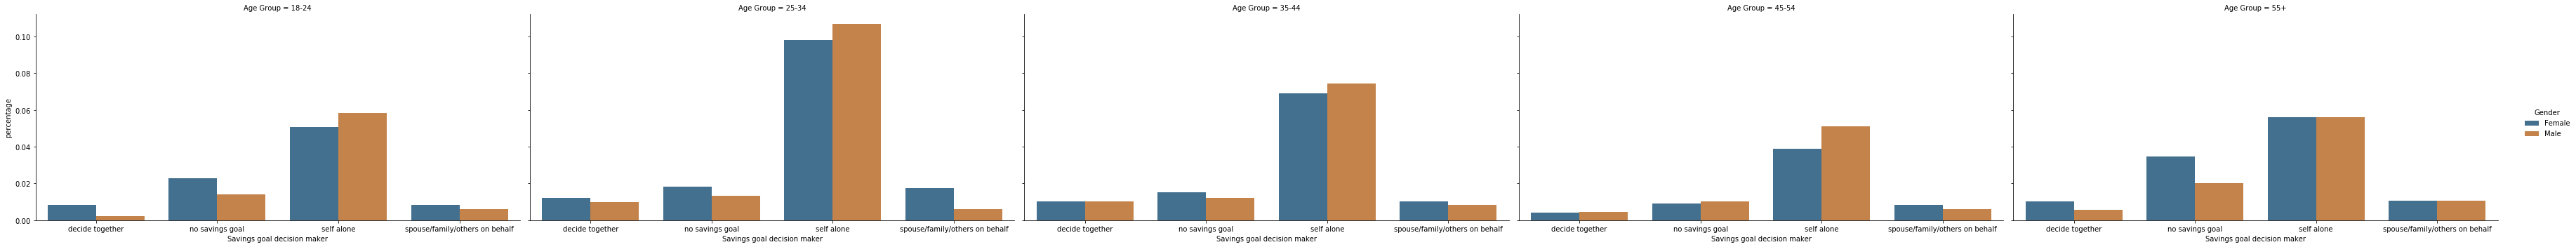

None

#### Savings goal influence by gender and expanded to Age Group

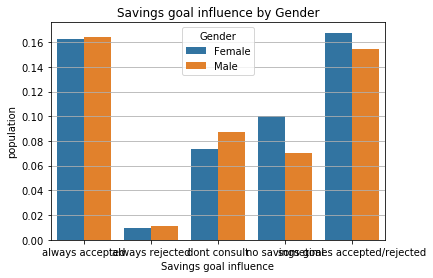

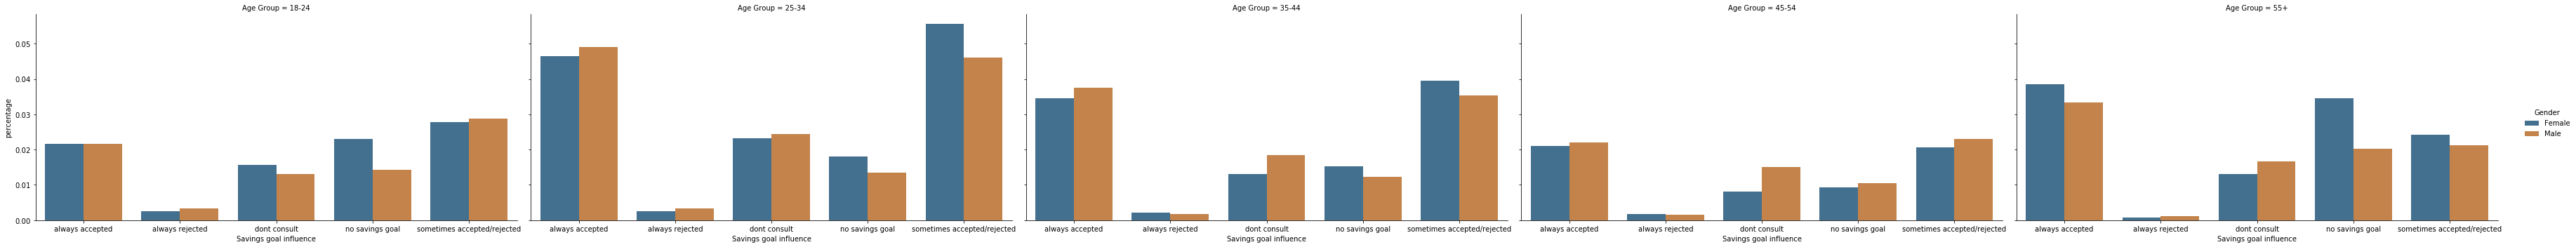

None

#### Land ownership by gender and expanded to Age Group

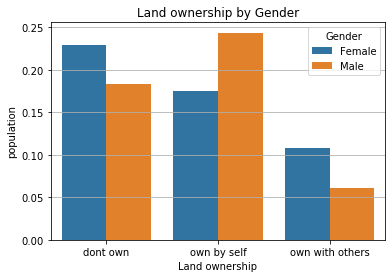

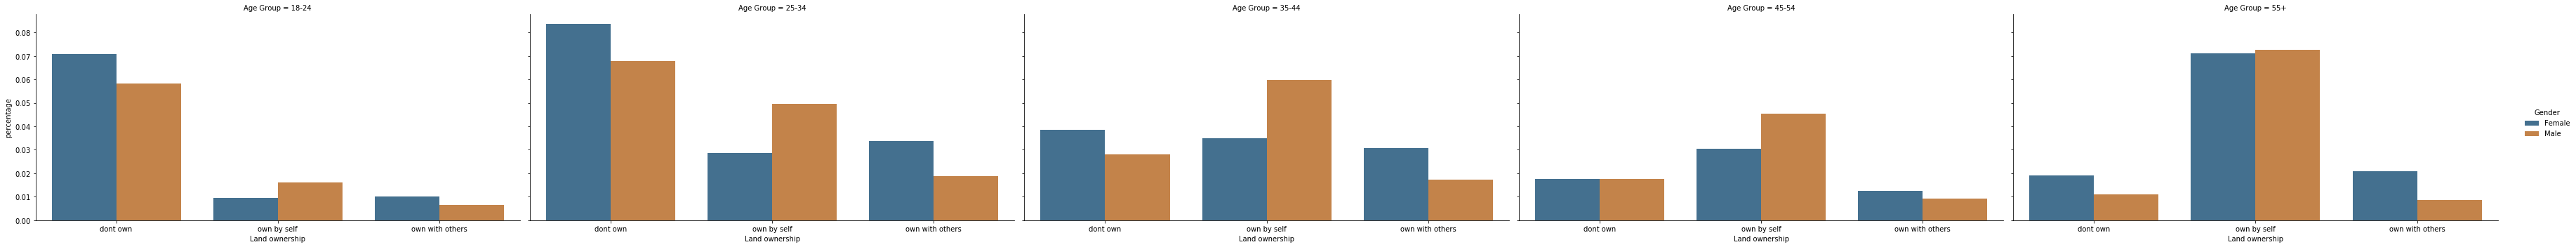

None

#### Land decision maker by gender and expanded to Age Group

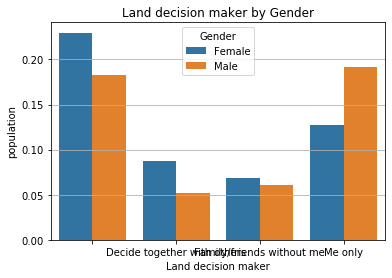

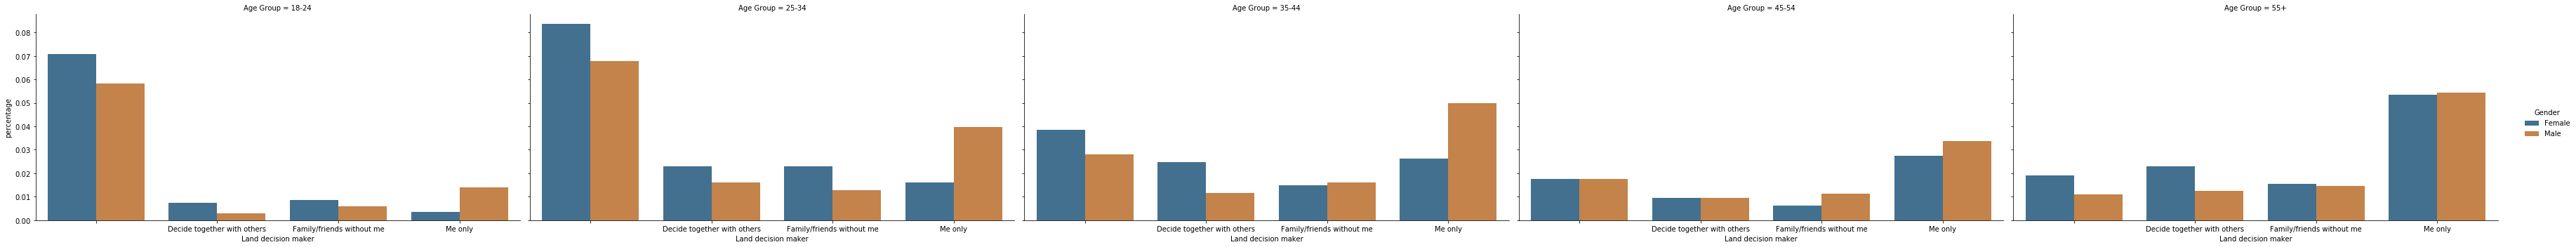

None

#### Children decision maker by gender and expanded to Age Group

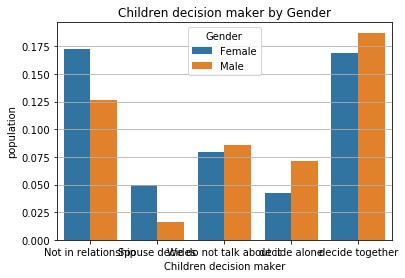

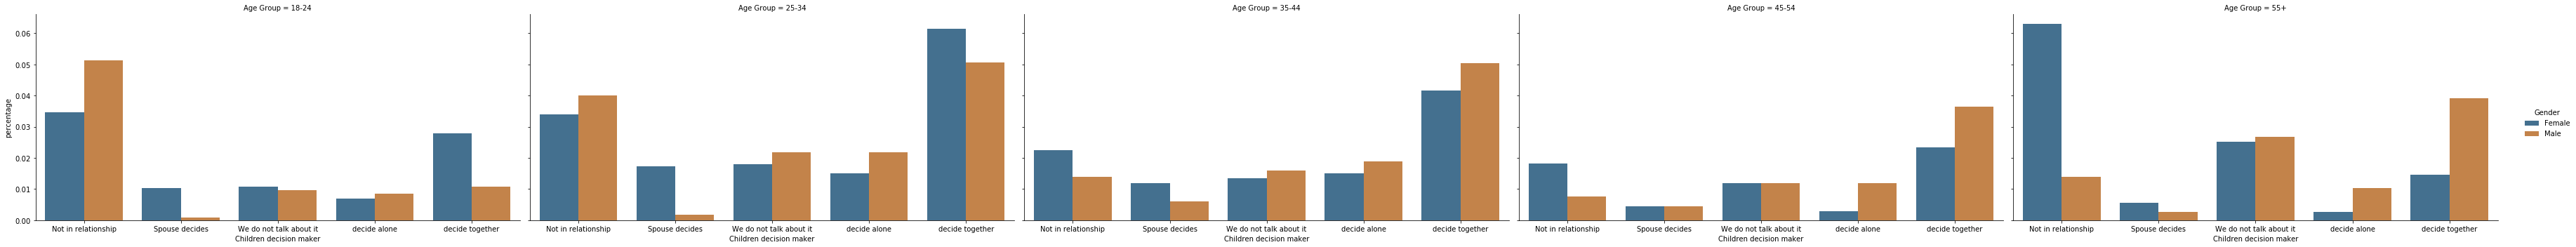

None

#### Earning frequency by gender and expanded to Age Group

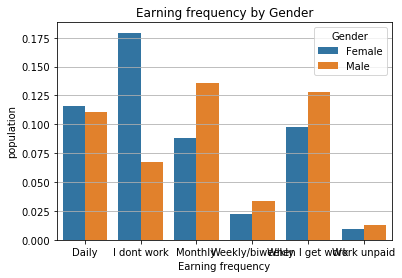

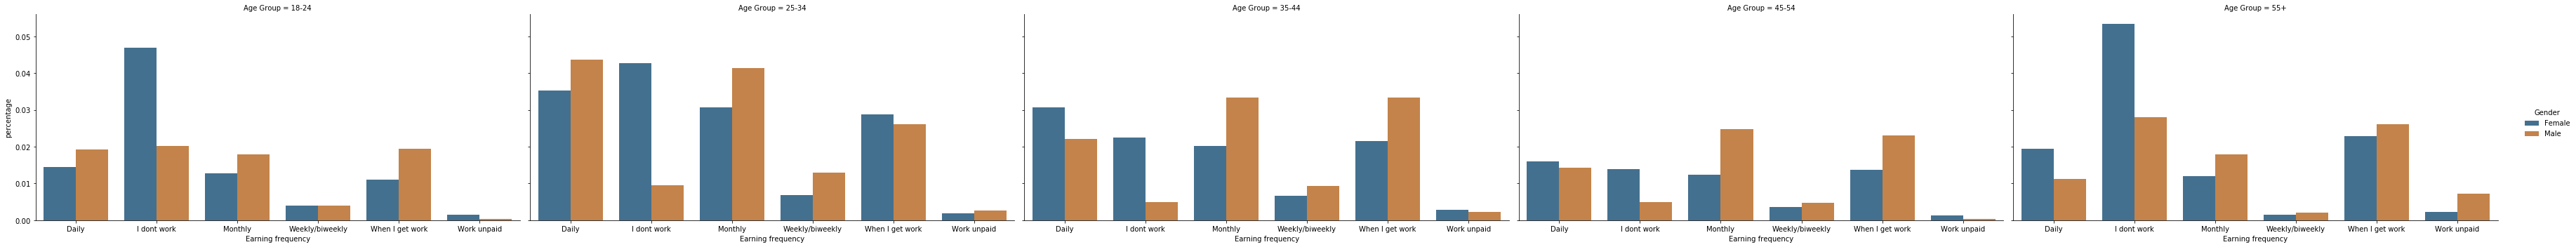

None

#### Spending decision maker by gender and expanded to Age Group

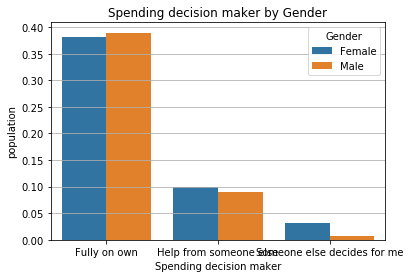

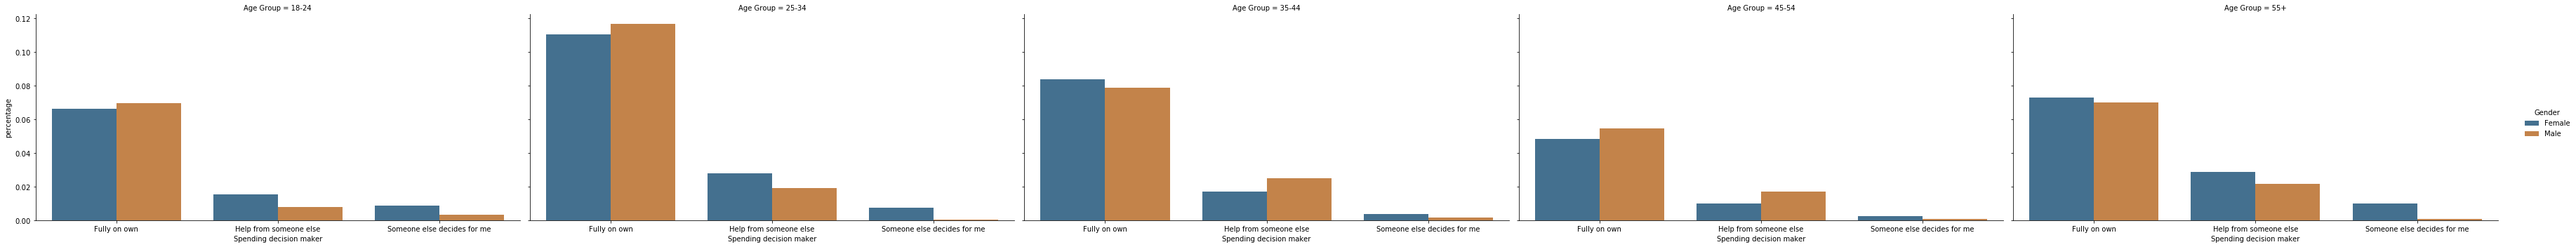

None

#### Permission to work by gender and expanded to Age Group

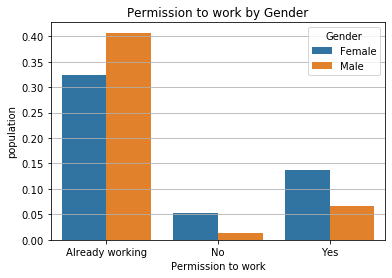

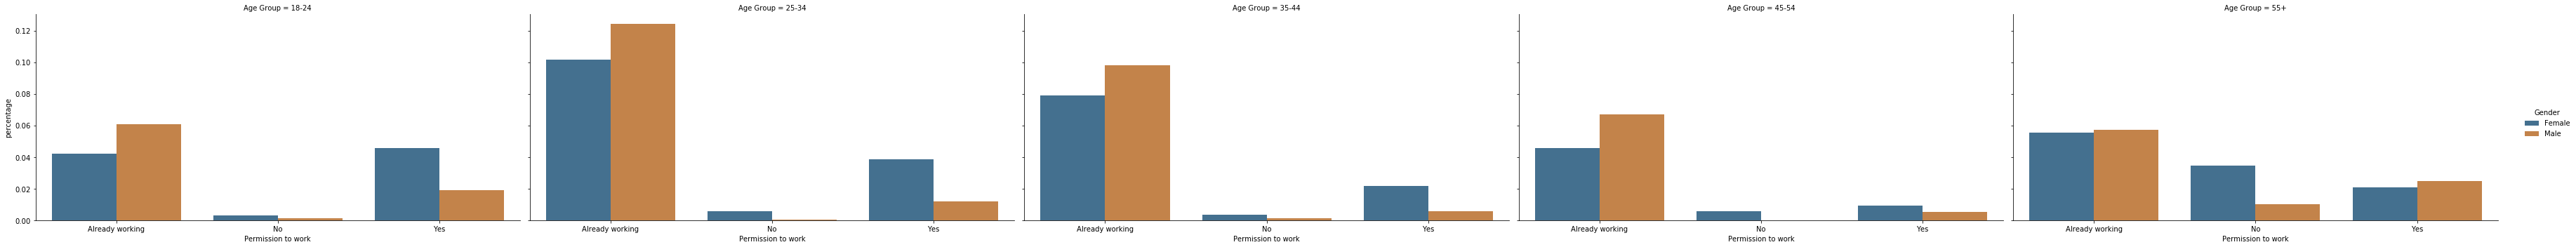

None

#### Main income earner by gender and expanded to Age Group

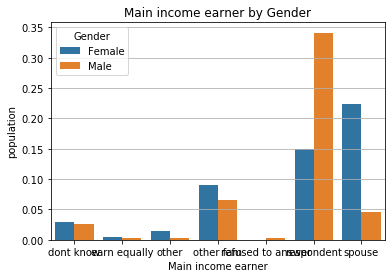

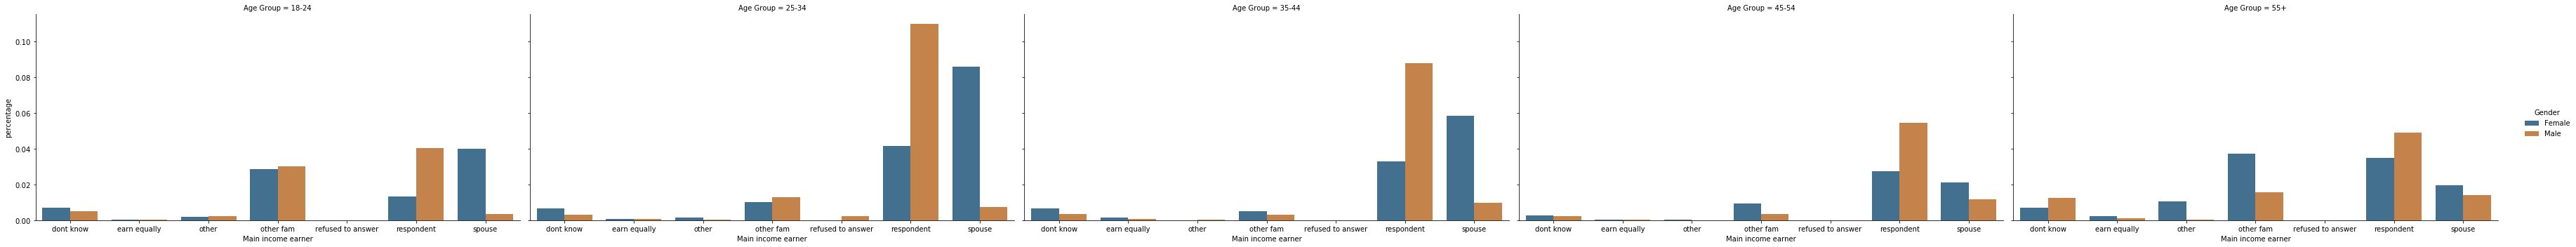

None

#### Migrant worker identity by gender and expanded to Age Group

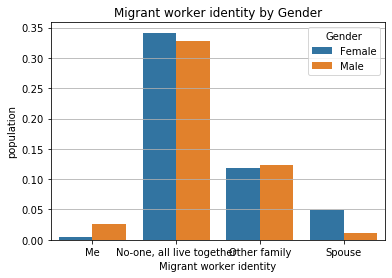

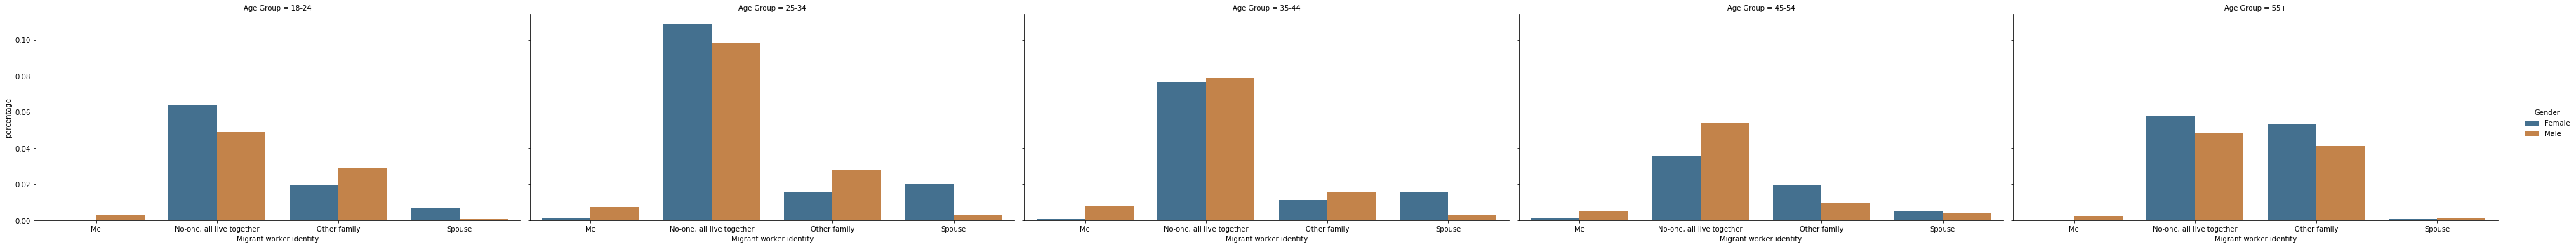

None

#### Possibility to raise 1/20 GNI (Gross National Income) by gender and expanded to Age Group

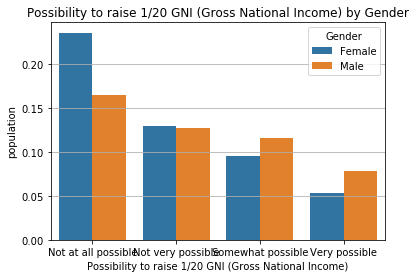

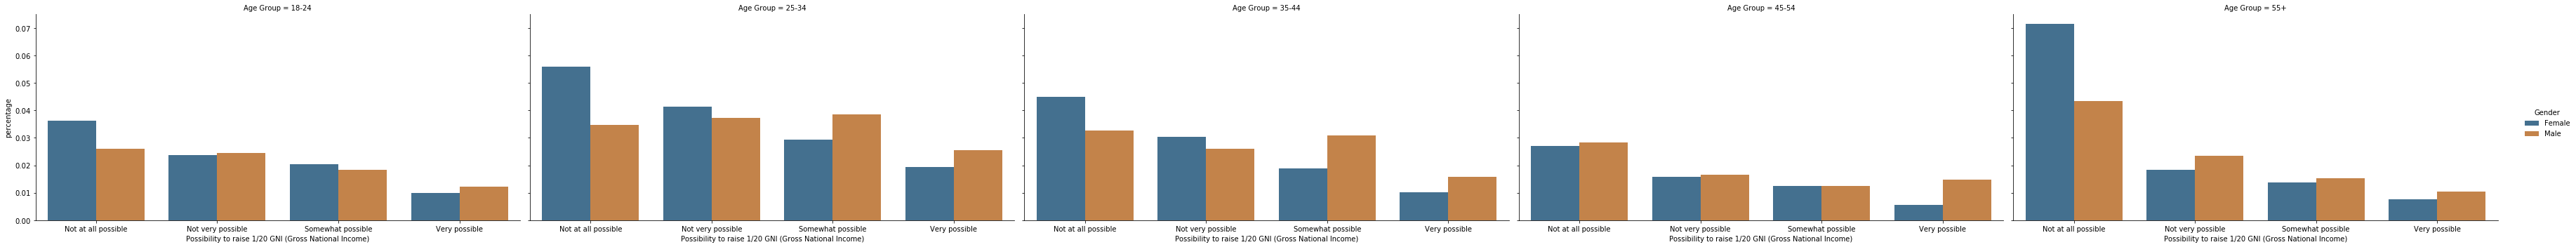

None

#### Income frequency of spouse by gender and expanded to Age Group

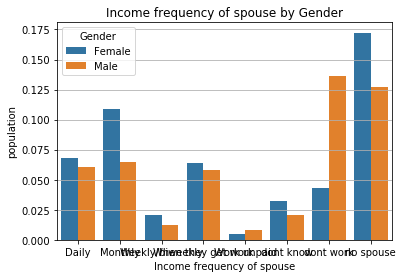

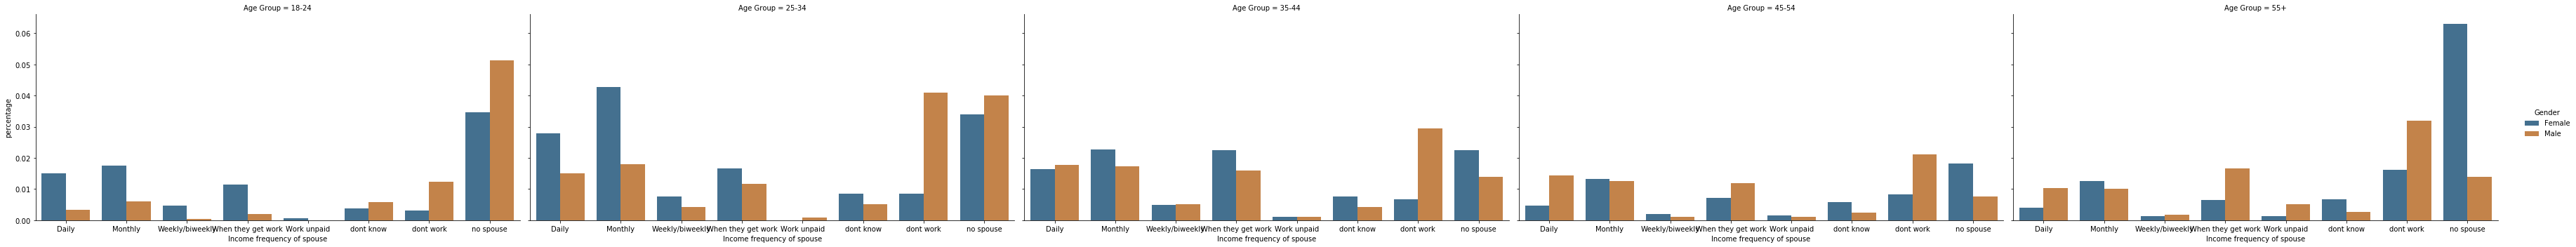

None

#### Allow spouse to work,, by gender and expanded to Age Group

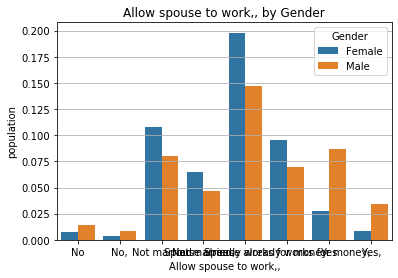

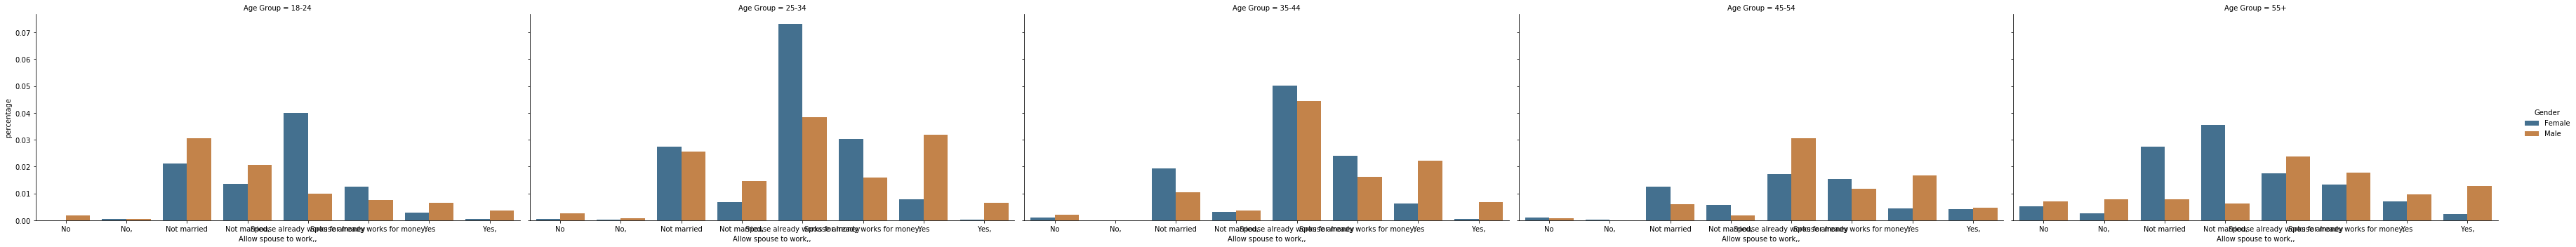

None

In [12]:
indColsLabel = ['Relationship status',
       'Urbanicity', 'Education', 'English literacy',
       'Own a phone', '$2.50 PPP Poverty line', 'Language of interview',
       'Main language', 'Mean household size', 'Region', 'Province',
       ' Phone ownership', 'Independent phone use', 'Informal financial usage',
       'Mobile Money', 'Bank', 'Permission to open bank',
       'Money taken from account', 'Savings goal decision maker',
       'Savings goal influence', 'Land ownership', 'Land decision maker',
       'Children decision maker', 'Earning frequency',
       'Spending decision maker', 'Permission to work', 'Main income earner',
       'Migrant worker identity',
       'Possibility to raise 1/20 GNI (Gross National Income)',
       'Income frequency of spouse', 'Allow spouse to work,,']
def plotBar(column, ind):
    fig, axes = plt.subplots()
    valuesL = datasetLabeled.groupby(['Gender',column])['finalweight'].agg(**{
                                    'sum': pd.NamedAgg(column='finalweight', aggfunc=sum)})
    valuesL['percentage'] = valuesL['sum']/valuesL['sum'].sum()
    #valuesL.unstack(1)['percentage']
    
    sns.barplot(x=column, y="percentage", hue="Gender", data=valuesL.reset_index(), ax = axes)
    axes.set_title(f'{column} by Gender')
    axes.yaxis.grid(True)
    axes.set_xlabel(f'{column}')
    axes.set_ylabel(f'population')
    
    valuesS = datasetLabeled.groupby(['Gender',column, ind])['finalweight'].agg(**{
                                    'sum': pd.NamedAgg(column='finalweight', aggfunc=sum)})
    valuesS['percentage'] = valuesS['sum']/valuesS['sum'].sum()
    
    df1 = valuesS['percentage'].reset_index()
    g = sns.catplot(x=column, y="percentage",
                hue="Gender", col=ind,
                data= df1,
                orient="v", saturation=.5,
                kind="bar", ci=None, aspect=2)  
    display(Markdown(f'#### {column} by gender and expanded to {ind}'))
    return display(plt.show())
    
    
for column in indColsLabel:
    plotBar(column, 'Age Group')

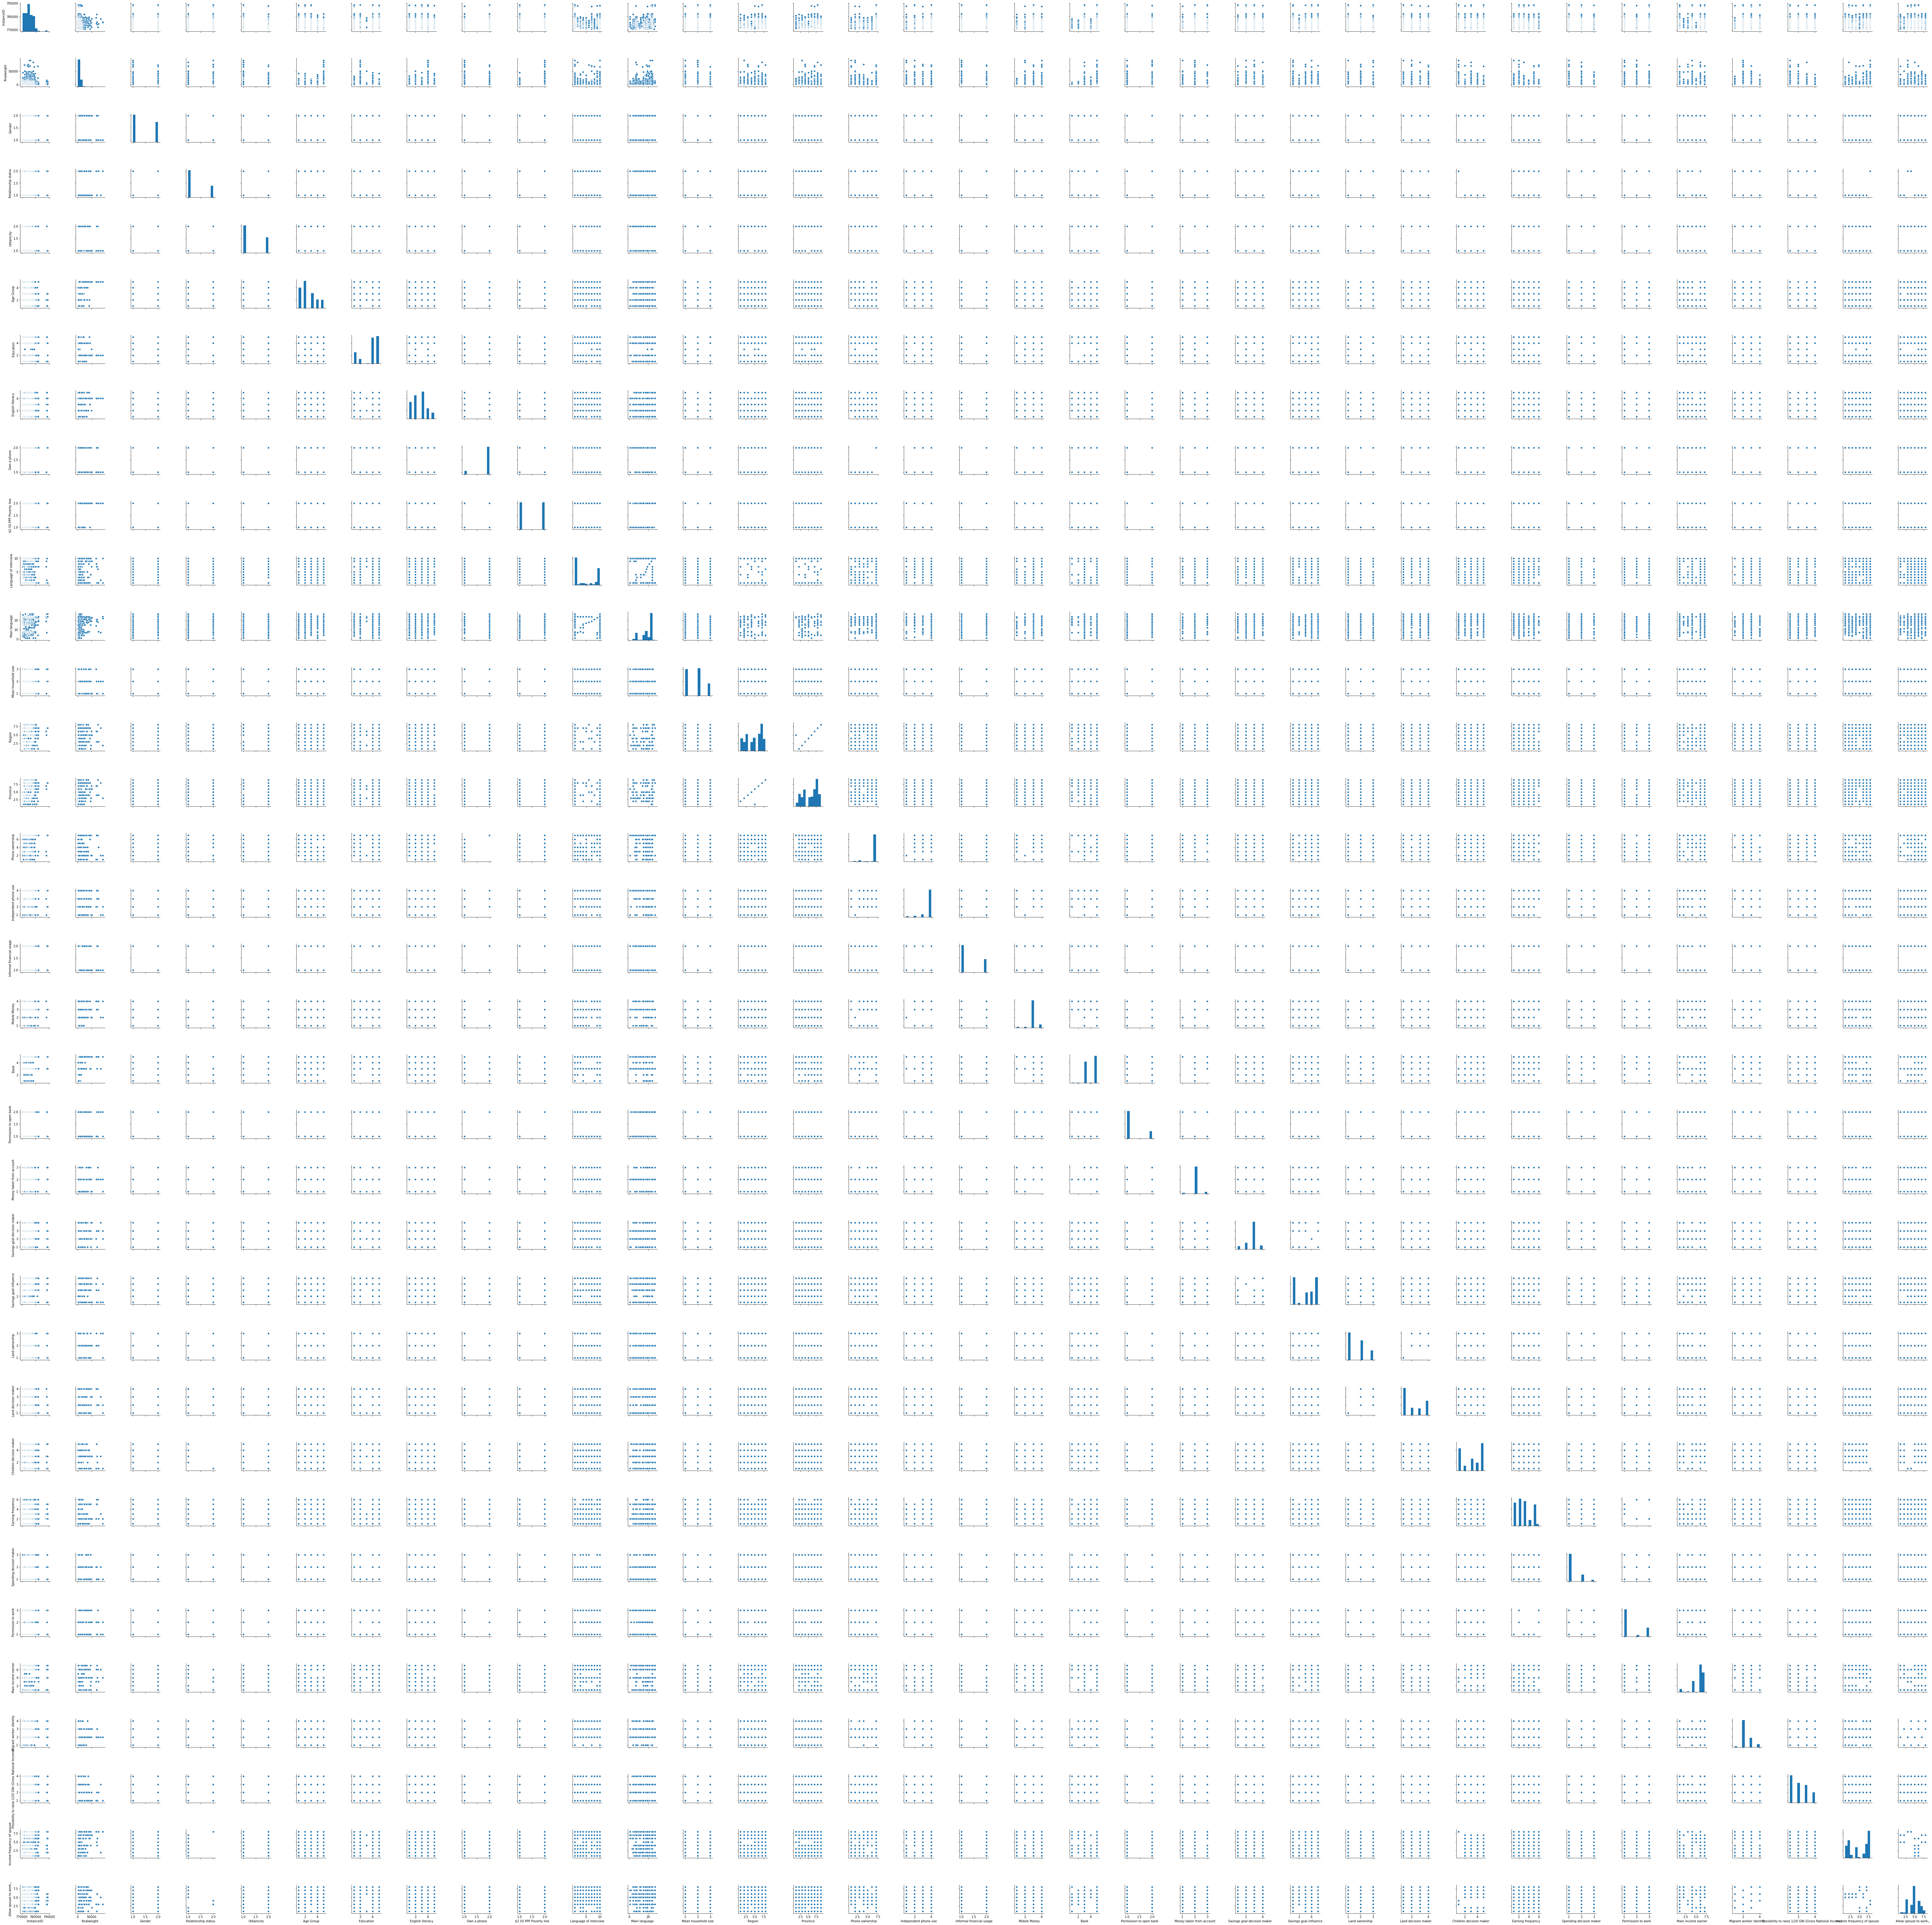

In [13]:
sns.pairplot(datasetLabeledTest)

In [14]:
for column in datasetLabeled:
    display(Markdown(f'#### {column}'))
    #print(dataset[column].unique())
    print(datasetLabeled.groupby(column)[column].count())
    print('_________________________________________________________')

#### InstanceID

InstanceID
770458    1
770459    1
770471    1
770485    1
770486    1
         ..
788542    1
788755    1
788762    1
788776    1
788781    1
Name: InstanceID, Length: 3000, dtype: int64
_________________________________________________________


#### finalweight

finalweight
119.347640      1
233.005960      2
324.475109      1
427.962014      3
586.768724      1
               ..
71589.293749    1
73626.007973    1
76351.052252    1
83608.643209    1
91545.839642    2
Name: finalweight, Length: 1141, dtype: int64
_________________________________________________________


#### Gender

Gender
Female    1731
Male      1269
Name: Gender, dtype: int64
_________________________________________________________


#### Relationship status

Relationship status
Married/relationship        2101
Not married/relationship     899
Name: Relationship status, dtype: int64
_________________________________________________________


#### Urbanicity

Urbanicity
Rural    1920
Urban    1080
Name: Urbanicity, dtype: int64
_________________________________________________________


#### Age Group

Age Group
18-24     771
25-34    1021
35-44     567
45-54     325
55+       316
Name: Age Group, dtype: int64
_________________________________________________________


#### Education

Education
Higher education        490
No formal education     196
Other                     6
Primary education      1126
Secondary education    1182
Name: Education, dtype: int64
_________________________________________________________


#### English literacy

English literacy
Excellent     595
Fair          833
Good          971
Not at all    377
Poorly        224
Name: English literacy, dtype: int64
_________________________________________________________


#### Own a phone

Own a phone
dont own phone     330
own phone         2670
Name: Own a phone, dtype: int64
_________________________________________________________


#### $2.50 PPP Poverty line

$2.50 PPP Poverty line
Above poverty line    1502
Below poverty line    1498
Name: $2.50 PPP Poverty line, dtype: int64
_________________________________________________________


#### Language of interview

Language of interview
English     1495
Kalenjin      34
Kamba         96
Kikuyu        91
Kisii         66
Luhya         13
Luo           94
Meru          38
Somali       160
Swahili      913
Name: Language of interview, dtype: int64
_________________________________________________________


#### Main language

Main language
Borana          7
Chonyi          1
Congolese       2
English        28
Gari           34
Gariama        15
Kalenjin      154
Kamba         242
Kibajuni        1
Kidigo         14
Kiduruma       15
Kiembu         15
Kiganda         2
Kikuria         7
Kikuyu        270
Kimbeere        7
Kisii         132
Luhya         142
Luo           235
Maasai         55
Meru          112
Mijikenda      20
Somali        290
Swahili      1171
Taita           9
Teso            2
Turkana        18
Name: Main language, dtype: int64
_________________________________________________________


#### Mean household size

Mean household size
Above mean size    1207
Below mean size    1241
Mean                552
Name: Mean household size, dtype: int64
_________________________________________________________


#### Region

Region
Central          320
Coast            230
Eastern          430
Nairobi          230
North Eastern    340
Nyanza           440
Rift Valley      700
Western          310
Name: Region, dtype: int64
_________________________________________________________


#### Province

Province
                90
Central        320
Coast          230
Eastern        430
Nairobi        230
North East     250
Nyanza         440
Rift Valley    700
Western        310
Name: Province, dtype: int64
_________________________________________________________


####  Phone ownership

 Phone ownership
Children                         22
Dont use mobile phone            69
Husband/wives                   121
Other man/women                  39
Parent                           49
Sibling                          30
own phone/business/employer    2670
Name:  Phone ownership, dtype: int64
_________________________________________________________


#### Independent phone use

Independent phone use
Dont use mobile phone      69
No                        100
Somewhat                  243
Yes                      2588
Name: Independent phone use, dtype: int64
_________________________________________________________


#### Informal financial usage

Informal financial usage
no     2015
yes     985
Name: Informal financial usage, dtype: int64
_________________________________________________________


#### Mobile Money

Mobile Money
dont use MM                68
dont use mobile phone      69
own                      2561
share/use others          302
Name: Mobile Money, dtype: int64
_________________________________________________________


#### Bank

Bank
other          20
other fam      18
own          1288
spouse         33
unbanked     1641
Name: Bank, dtype: int64
_________________________________________________________


#### Permission to open bank

Permission to open bank
no     2370
yes     630
Name: Permission to open bank, dtype: int64
_________________________________________________________


#### Money taken from account

Money taken from account
dont have account     110
money not taken      2701
money taken           189
Name: Money taken from account, dtype: int64
_________________________________________________________


#### Savings goal decision maker

Savings goal decision maker
decide together                    229
no savings goal                    475
self alone                        2020
spouse/family/others on behalf     276
Name: Savings goal decision maker, dtype: int64
_________________________________________________________


#### Savings goal influence

Savings goal influence
always accepted                1009
always rejected                  58
dont consult                    445
no savings goal                 475
sometimes accepted/rejected    1013
Name: Savings goal influence, dtype: int64
_________________________________________________________


#### Land ownership

Land ownership
dont own           1459
own by self        1046
own with others     495
Name: Land ownership, dtype: int64
_________________________________________________________


#### Land decision maker

Land decision maker
                               1459
Decide together with others     401
Family/friends without me       369
Me only                         771
Name: Land decision maker, dtype: int64
_________________________________________________________


#### Children decision maker

Children decision maker
Not in relationship         899
Spouse decides              195
We do not talk about it     485
decide alone                314
decide together            1107
Name: Children decision maker, dtype: int64
_________________________________________________________


#### Earning frequency

Earning frequency
Daily              671
I dont work        783
Monthly            710
Weekly/biweekly    170
When I get work    611
Work unpaid         55
Name: Earning frequency, dtype: int64
_________________________________________________________


#### Spending decision maker

Spending decision maker
Fully on own                   2325
Help from someone else          554
Someone else decides for me     121
Name: Spending decision maker, dtype: int64
_________________________________________________________


#### Permission to work

Permission to work
Already working    2162
No                  127
Yes                 711
Name: Permission to work, dtype: int64
_________________________________________________________


#### Main income earner

Main income earner
dont know             144
earn equally           15
other                  29
other fam             537
refused to answer       4
respondent           1327
spouse                944
Name: Main income earner, dtype: int64
_________________________________________________________


#### Migrant worker identity

Migrant worker identity
Me                             79
No-one, all live together    2005
Other family                  696
Spouse                        220
Name: Migrant worker identity, dtype: int64
_________________________________________________________


#### Possibility to raise 1/20 GNI (Gross National Income)

Possibility to raise 1/20 GNI (Gross National Income)
Not at all possible    1095
Not very possible       788
Somewhat possible       702
Very possible           415
Name: Possibility to raise 1/20 GNI (Gross National Income), dtype: int64
_________________________________________________________


#### Income frequency of spouse

Income frequency of spouse
Daily                 405
Monthly               589
Weekly/biweekly       107
When they get work    359
Work unpaid            31
dont know             145
dont work             465
no spouse             899
Name: Income frequency of spouse, dtype: int64
_________________________________________________________


#### Allow spouse to work,,

Allow spouse to work,,
No                                   50
No,                                  34
Not married                         558
Not married,                        341
Spouse already works for money     1102
Spouse already works for money,     503
Yes                                 295
Yes,                                117
Name: Allow spouse to work,,, dtype: int64
_________________________________________________________


Most of the columns holds categorical data, so a similar strategy followed in other tools like national surveys or msme.

The difference with this too is the idea of categorization comparing primary the gender.

Regarding correlation it seems that Mobile indicators are correlated and the female status on the household is correlated with certain indicators.

## to interact live with the test data

In [15]:
pivot_ui(datasetLabeled)